In [1]:
#Libraries for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Standard numerical and scientific libraries
import numpy as np
import scipy as sp

#Units, Constants, Fits reading libraries
from astropy import units as U
from astropy import constants as C
from astropy.io import fits
from astropy.io import ascii

#Automatic spectra reading tools
from specutils.io import read_fits

#Astronomy related packages
from PyAstronomy import pyasl
from specutils import extinction

import sfdmap  #for the SFD dust maps 

from decimal import Decimal #convert to decimals
from astropy.coordinates import SkyCoord
import pandas as pd

from string import rstrip

# Packages for fancy box:
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
from matplotlib.patches import FancyBboxPatch

#Load files:
mags = np.loadtxt("/home/christina/Desktop/QSOs/mags.list")
wisemags = np.loadtxt("/home/christina/Desktop/QSOs/wisemags.list")
comp_file=np.loadtxt('/home/christina/Desktop/QSOs/compoM.data')
zab = np.loadtxt("/home/christina/Desktop/QSOs/zab1.list")
names = np.loadtxt("/home/christina/Desktop/QSOs/names.list", dtype=np.str)
gaia = np.loadtxt("/home/christina/Desktop/QSOs/GaiaFullphot_Stripe82zpm.dat") #gaia photometry and proper motion(sources in Stripe82
zzpm = np.loadtxt("/home/christina/Desktop/QSOs/zzpm.list")    #coords and proper motion file


In [2]:
#GTC targets:
gtcBmags = np.loadtxt("/home/christina/Desktop/QSOs/GTC/GTC18B/mags.list")
gtcBzab = np.loadtxt("/home/christina/Desktop/QSOs/GTC/GTC18B/zab.list")
gtcBnames = np.loadtxt("/home/christina/Desktop/QSOs/GTC/GTC18B/names.list", dtype=np.str)

#ugtc = gtcBmags[9:,0]    
#ggtc = gtcBmags[9:,1]
#rgtc = gtcBmags[9:,2]
#igtc = gtcBmags[9:,3]
#zgtc = gtcBmags[9:,4] #zs in order to not confuse with the redshift
#ygtc = gtcBmags[9:,5]
#jgtc = gtcBmags[9:,6]
#hgtc = gtcBmags[9:,7]
#kgtc = gtcBmags[9:,8]

In [3]:
gtcmags = np.loadtxt("/home/christina/Desktop/QSOs/GTC/newmags.list")
ugtc = gtcmags[9:,0]    #start from 9th element
ggtc = gtcmags[9:,1]
rgtc = gtcmags[9:,2]
igtc = gtcmags[9:,3]
zgtc = gtcmags[9:,4]
ygtc = gtcmags[9:,5]
jgtc = gtcmags[9:,6]
hgtc = gtcmags[9:,7]
kgtc = gtcmags[9:,8]


In [4]:
f = open("/home/christina/Desktop/QSOs/coord.list", "r")   #coordinates of the NOT targets 
e=open("/home/christina/Desktop/QSOs/NOTcoordeg.list", "w")    #open file to write 
rah,decd = [], []
for l in f:
    row = l.split()
    rah = row[0]
    decd = row[1]
    coor= np.array([rah,decd])
    a=' '.join(coor)
    ranot, decnot = pyasl.coordsSexaToDeg(a)
    #print ranot,decnot
    coo = np.array([ranot,decnot])
    #print coo
    b=(' '.join(map(str,coo)))
    #print b
    e.write("%s\n" % b)
    #np.savetxt('/home/christina/Desktop/QSOs/NOTcoordeg.list', (ranot,decnot), delimiter='', fmt="%s")
    #a=np.array([ranot,decnot])
    #c=''.join(str(b))
    #result = str(a).replace("()", "")
    #res1 = str(result).replace("[]", "")
    #c= ''.join(str(result))

    #c=str.strip('')
    #print ranot, decnot
    #co=np.array([ranot,decnot])
e.close()

In [5]:
#GAIA Stripe82 photometry, coordinates and proper motion data 
ra = gaia[:,0]
dec = gaia[:,1]
pm = gaia[:,2]      #proper motion
epm = gaia[:,3]     #proper motion error
plx = gaia[:,4]     #parallax
eplx = gaia[:,5]    #parallax error
G = gaia[:,6]
BP = gaia[:,7]
RP = gaia[:,8]
ugaia = gaia[:,9]
ugaia_err = gaia[:,10]
ggaia = gaia[:,11]
ggaia_err = gaia[:,12]
rgaia = gaia[:,13]
rgaia_err = gaia[:,14]
igaia = gaia[:,15]
igaia_err = gaia[:,16]
zgaia = gaia[:,17]
zgaia_err = gaia[:,18]
Ygaia = gaia[:,19]
Ygaia_err = gaia[:,20]
Jgaia = gaia[:,21]
Jgaia_err = gaia[:,22]
Hgaia = gaia[:,23]
Hgaia_err = gaia[:,24]
Ks = gaia[:,25]
Ks_err = gaia[:,26]
W1 = gaia[:,27]
W1_err = gaia[:,28]
W2 = gaia[:,29]
W2_err = gaia[:,30]
W3 = gaia[:,31]
W3_err = gaia[:,32]
W4 = gaia[:,33]
W4_err = gaia[:,34]
specz = gaia[:,35]     #spectroscopic redshift
photz = gaia[:,36]     #photometric redshift
raz = zzpm[:,1]
decz = zzpm[:,2]
photzz = zzpm[:,3]
print ggaia-rgaia
print ggaia
print rgaia

[1.555    1.410999 1.391001 ... 0.181999 1.478    1.471   ]
[21.934    20.188999 19.554001 ... 18.962999 21.086    19.944   ]
[20.379 18.778 18.163 ... 18.781 19.608 18.473]


In [6]:
#The SDSS magnitudes
u = mags[:,0]
g = mags[:,1]
r = mags[:,2]
i = mags[:,3]
zs = mags[:,4] #zs in order to not confuse with the redshift
y = mags[:,5]
j = mags[:,6]
h = mags[:,7]
k = mags[:,8]

#WISE magnitudes
w1 = wisemags[:,0]
w2 = wisemags[:,1]
w3 =wisemags[:,2]
w4 = wisemags[:,3]

In [7]:
#print min(enumerate(ugaia), key=lambda x: abs(x[1]-21.8747))
#print gaia[181,9]
index = np.argmin(np.abs(np.array(ggaia)-20.643999))
print index
print ggaia[index]
print ugaia[index]
print rgaia[index]
print W1[index]


487
20.643999
23.615999
19.191
15.849


In [8]:
#coldist = np.sqrt((ggaia-rgaia)**2+(Jgaia-Ks)**2)
notcoo = np.loadtxt("/home/christina/Desktop/QSOs/NOTcoordeg.list")
ranot=notcoo[:,0]
decnot=notcoo[:,1]

In [9]:
flt=np.nonzero((ra >= 300))
ra[flt]=ra[flt]-360
#print len(ra)
fltn=np.nonzero((ranot >= 300))
ranot[fltn]=ranot[fltn]-360

In [10]:
#fl=np.nonzero((ugaia==22.798000) & (ggaia== ))
for n in range(len(ugaia)):
    if (igaia[n]==19.243999): # & (ggaia[n]==20.643999)): # ugaia[n]==22.798000:
        #print igaia[n]
        print W1[n]

16.739
17.346001
16.580999
16.771999
17.226999
16.709
16.613001
14.974
17.753
16.549
16.323
17.667
15.846
17.283001
16.507999
17.608
16.101999
16.620001
16.181
16.218
16.089001
16.414
17.601
16.434
16.030001
15.831
17.306
17.458
16.997
16.905001
17.122
16.372999


30245
963
28
111
61
[-23.079116 -30.426602 -19.433502 -18.583571 -12.269482  22.357586
  39.015744  37.67704    2.091973  41.560592]


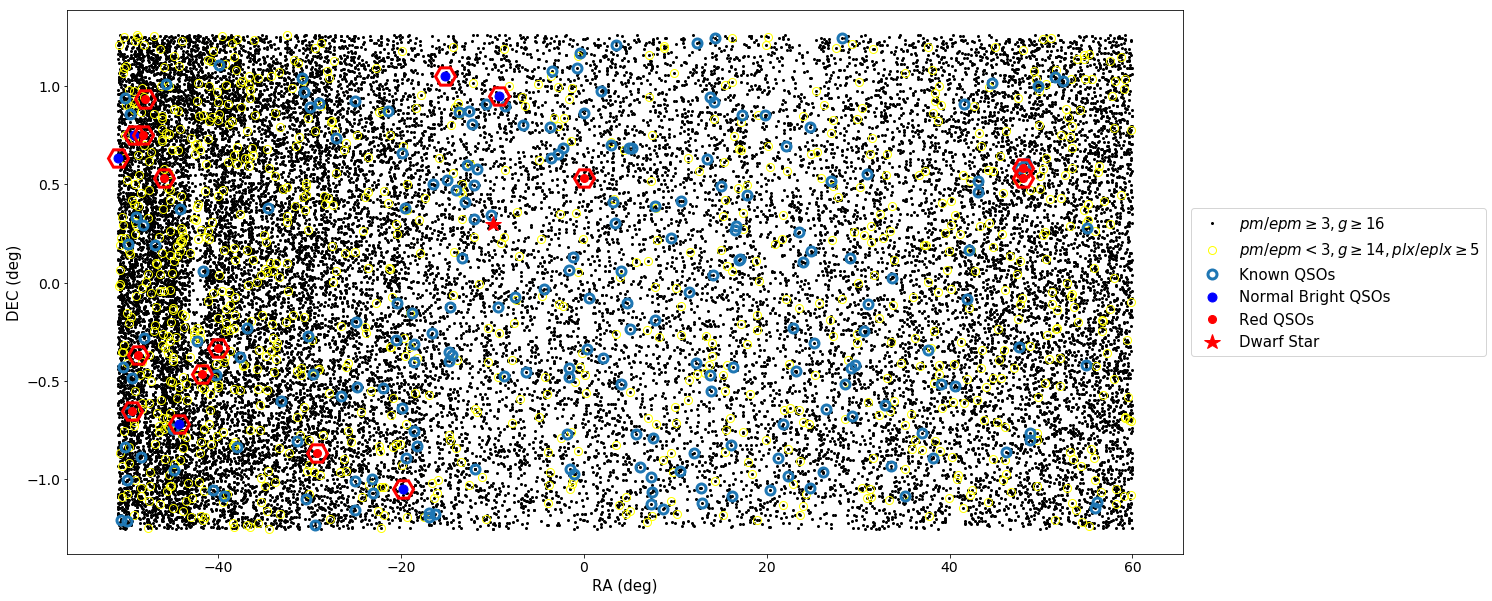

In [35]:
blim = 14.
rlim = 20.
c = SkyCoord(ra=ra*U.degree, dec=dec*U.degree, frame='icrs')

#f1=np.nonzero((ggaia >= 16)) #& (rgaia < rlim))   # with proper motion 
f2=np.nonzero((pm/epm <= 3) & (ggaia >= 16))     # proper motion within 3sigma 
f3=np.nonzero((pm/epm < 3) & (ggaia >= 16) & (plx/eplx >=5))    # with parallax (stars)
#f4=np.nonzero((ggaia>=16) & (plx/eplx>=5))          #with parallax
f5=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 0.05) & (specz <=1))
f6=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 1) & (specz <=2))
f7=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 2) & (specz <=3))
f8=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 3) & (specz <=10))

#print len(ra[f1])
print len(ra[f2])
print len(ra[f3])
#print len(ra[f4])
print len(ra[f5])
print len(ra[f6])
print len(ra[f7])
print ra[f8]

#Plot
fig = plt.figure(figsize=(20,10))
#plt.plot(ra[f1],dec[f1], 'ko', markersize=2,label=r'$r \leq 20, g \geq 16$')
#plt.subplot(111,projection="aitoff")
plt.plot(ra[f2],dec[f2], 'ko', markersize=2, label=r'$pm/epm \geq 3, g \geq 16$')     
plt.plot(ra[f3],dec[f3],marker= 'o', mfc='none', linestyle='none', color='yellow', markersize=8, label=r'$pm/epm < 3, g \geq 14, plx/eplx \geq 5$')
plt.plot(ra[f5],dec[f5], marker='o',color='tab:blue',mfc='none', markeredgewidth=3, markersize=9,linestyle="None", label=r'Known QSOs')
plt.plot(ra[f6],dec[f6],marker='o',color='tab:blue',mfc='none', markeredgewidth=3, markersize=9,linestyle="None")
plt.plot(ra[f7],dec[f7],marker='o',color='tab:blue', mfc='none', markeredgewidth=3, markersize=9,linestyle="None")
plt.plot(ra[f8],dec[f8],marker='o',color='tab:blue',mfc='none', markeredgewidth=3, markersize=9,linestyle="None")

Nspec=18
for s in range(Nspec):
    if s in range(Nspec-12):
        plt.plot(ranot[s], decnot[s],marker='H',color='red',mfc='none', markersize=20, markeredgewidth=3, linestyle='None')
        plt.plot(ranot[s], decnot[s],marker='o',color='blue', linestyle= 'none', markersize = 9, label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(ranot[s],decnot[s], '*r', markersize=16, label= 'Dwarf Star')   #Plot the dwarf star
    else:
        plt.plot(ranot[s], decnot[s],marker='H',color='red',mfc='none', markersize=20, markeredgewidth=3, linestyle='None')
        plt.plot(ranot[s], decnot[s],marker='o', color='red', linestyle='None', markersize = 8, label= 'Red QSOs'if s == 7 else "")    #Red Quasars
        

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)        
plt.xlabel("RA (deg)", fontsize=15)
plt.ylabel("DEC (deg)",fontsize=15) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/radec.pdf")
plt.show()

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    [(333.039229, -1.207936), (333.083575, -1.173793),
     (333.189507, -1.245894), ..., (  5.444671, -0.813322),
     (  5.730379, -0.588553), ( 15.420991,  1.252652)]>
<SkyCoord (Galactic): (l, b) in deg
    [( 60.29760765, -43.86983753), ( 60.37272821, -43.88395584),
     ( 60.38380575, -44.01182894), ..., (106.56919576, -62.73903213),
     (107.29243188, -62.5912237 ), (128.30707453, -61.51211702)]>


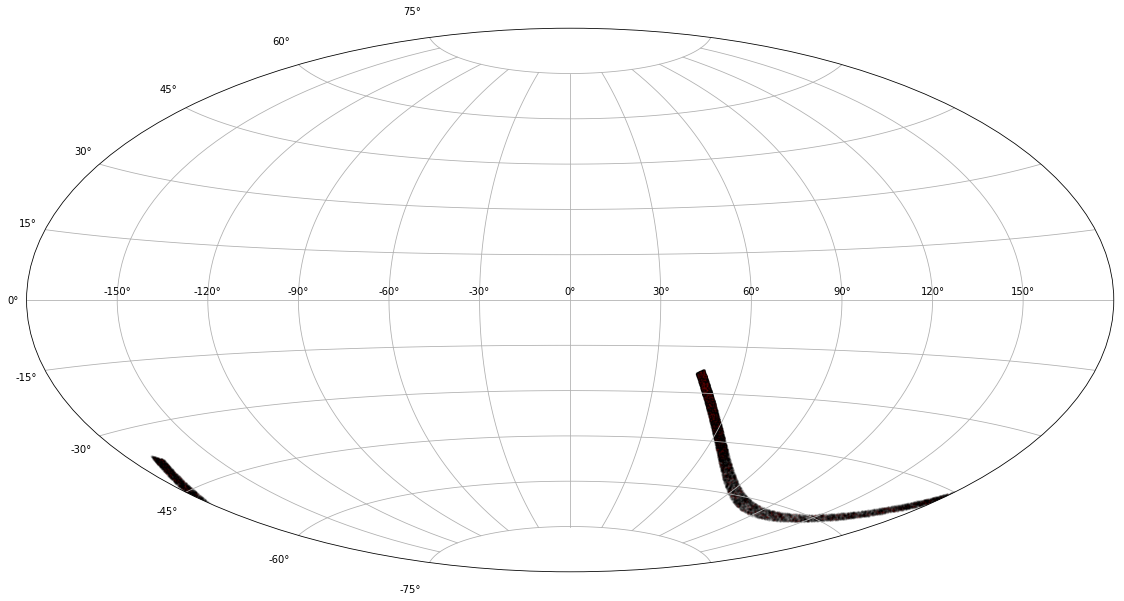

In [12]:
blim = 14.
rlim = 20.
c = SkyCoord(ra=ra*U.degree, dec=dec*U.degree, frame='fk5')
print c
c_gal = c.galactic
print c_gal
ra_rad = c_gal.l.radian
ra_rad[ra_rad > np.pi] -= 2. * np.pi
dec_rad = c_gal.b.radian

f1=np.nonzero((ggaia >= 16)& (rgaia < rlim))
f2=np.nonzero((pm/epm <= 3) & (ggaia >= 16))     # proper motion within 3sigma 
f3=np.nonzero((pm/epm < 3) & (ggaia >= blim) & (plx/eplx >=5))
f4=np.nonzero((ggaia>=16) & (plx/eplx>=5))          #with parallax
f5=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 0.05) & (specz <=1))
f6=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 1) & (specz <=2))
f7=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 2) & (specz <=3))
f8=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 3) & (specz <=10))

#Plot the data in Aitoff projection with a grid.
fig = plt.figure(figsize=(20,10))
#plt.plot(ra[f1],dec[f1], 'bo', markersize=3)
plt.subplot(111,projection="aitoff")
#plt.plot(ra_rad[f2], dec_rad[f2], marker='o', linestyle = 'none', color = 'black')
#plt.plot(ra_rad[f3], dec_rad[f3], marker='o', linestyle = 'none', color = 'red')
#plt.plot(ra_rad[f5],dec_rad[f5], marker='o',color='tab:blue',mfc='none', markeredgewidth=3, markersize=9,linestyle="None", label=r'Known QSOs')

plt.scatter(ra_rad[f2], dec_rad[f2],s=2, color='black', alpha=0.05)
plt.scatter(ra_rad[f3], dec_rad[f3], s=1, color='red', alpha=0.05)
plt.scatter(ra_rad[f5], dec_rad[f5], s=1, color='red', alpha=0.05)
plt.grid()

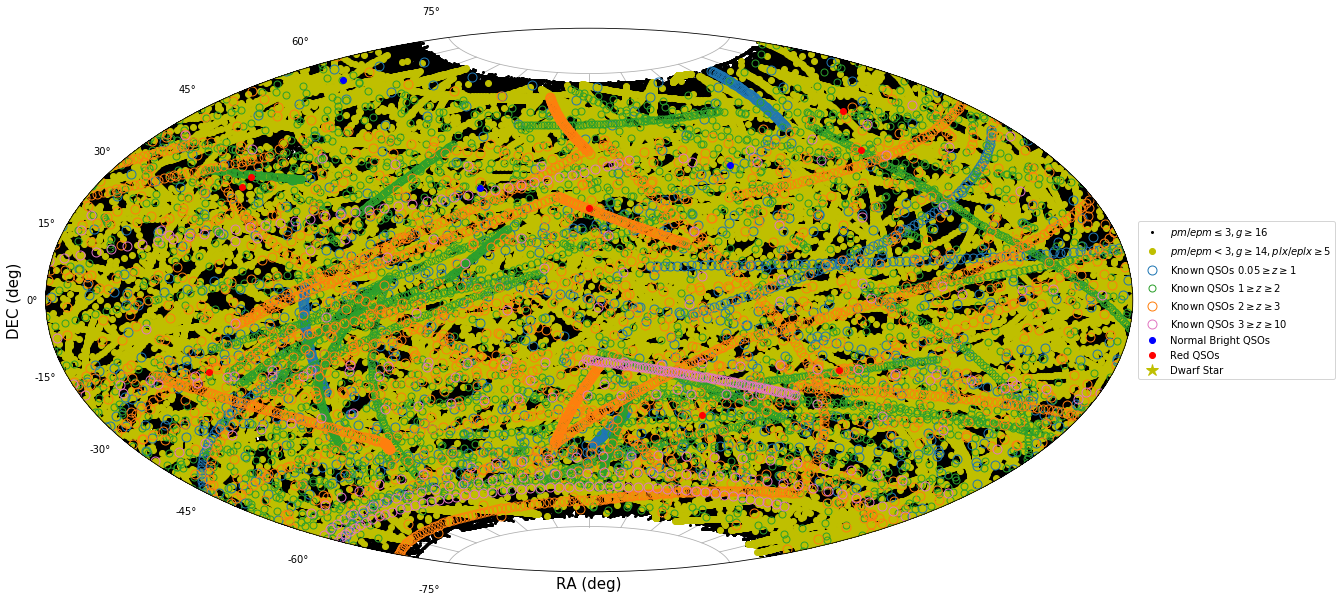

In [13]:
#RA-DEC diagram
blim = 14.
rlim = 20.
c = SkyCoord(ra=ra*U.degree, dec=dec*U.degree, frame='fk5')
c_gal = c.galactic
l_rad = c_gal.l.radian
l_rad[l_rad > np.pi] -= 2. * np.pi
b_rad = c_gal.b.radian


f1=np.nonzero((ggaia >= 16)& (rgaia < rlim))
f2=np.nonzero((pm/epm <= 3) & (ggaia >= 16))     # proper motion within 3sigma 
f3=np.nonzero((pm/epm < 3) & (ggaia >= blim) & (plx/eplx >=5))
f4=np.nonzero((ggaia>=16) & (plx/eplx>=5))          #with parallax
f5=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 0.05) & (specz <=1))
f6=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 1) & (specz <=2))
f7=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 2) & (specz <=3))
f8=np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 3) & (specz <=10))

#Plot the data in Aitoff projection with a grid.
fig = plt.figure(figsize=(20,10))
#plt.plot(ra[f1],dec[f1], 'bo', markersize=3)
plt.subplot(111,projection="aitoff")

#plt.subplot(111,projection="mollweide")
plt.plot(ra[f2],dec[f2], 'ko', markersize=2, label=r'$pm/epm \leq 3, g \geq 16$')     
plt.plot(ra[f3],dec[f3], 'yo', markersize=6, label=r'$pm/epm < 3, g \geq 14, plx/eplx \geq 5$')
plt.plot(ra[f5],dec[f5], marker='o',color='tab:blue', markersize=9,linestyle="None",mfc='none', label=r'Known QSOs $0.05 \geq z \geq 1$')
plt.plot(ra[f6],dec[f6],marker='o',color='tab:green', markersize=7,linestyle="None", mfc='none', label=r'Known QSOs $1 \geq z \geq 2$')
plt.plot(ra[f7],dec[f7],marker='o',color='tab:orange', markersize=9,linestyle="None", mfc='none', label = r'Known QSOs $2 \geq z \geq 3$')
plt.plot(ra[f8],dec[f8],marker='o',color='tab:pink', markersize=9,linestyle="None", mfc='none', label = r'Known QSOs $3 \geq z \geq  10$')
#plt.axis([309,360,-1.5,1.5])

#Overplot the NOT targets:
Nspec=18
for s in range(Nspec):
    if s in range(Nspec-12):
        plt.plot(ranot[s], decnot[s],'bo', label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(ranot[s],decnot[s], '*y', markersize=13, label= 'Dwarf Star')   #Plot the dwarf star
    else:
        plt.plot(ranot[s], decnot[s],'ro', label= 'Red QSOs'if s == 7 else "")    #Red Quasars
        
plt.xlabel("RA (deg)", fontsize=15)
plt.ylabel("DEC (deg)",fontsize=15) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.subplot(111,projection="aitoff")
plt.grid()
plt.show()



In [14]:
#Calculate ebv values for GAIA table and write to file

m = sfdmap.SFDMap('/home/christina/Desktop/QSOs/Dust/')
ebv = m.ebv(ra, dec, frame='icrs', interpolate=True)

filename='ebvgaia.list'   #create file to write
with open(filename, mode="wb") as outfile:   #open file in write mode
    for n in ebv:
        outfile.write("%s\n" % n)     #write each element in a new line

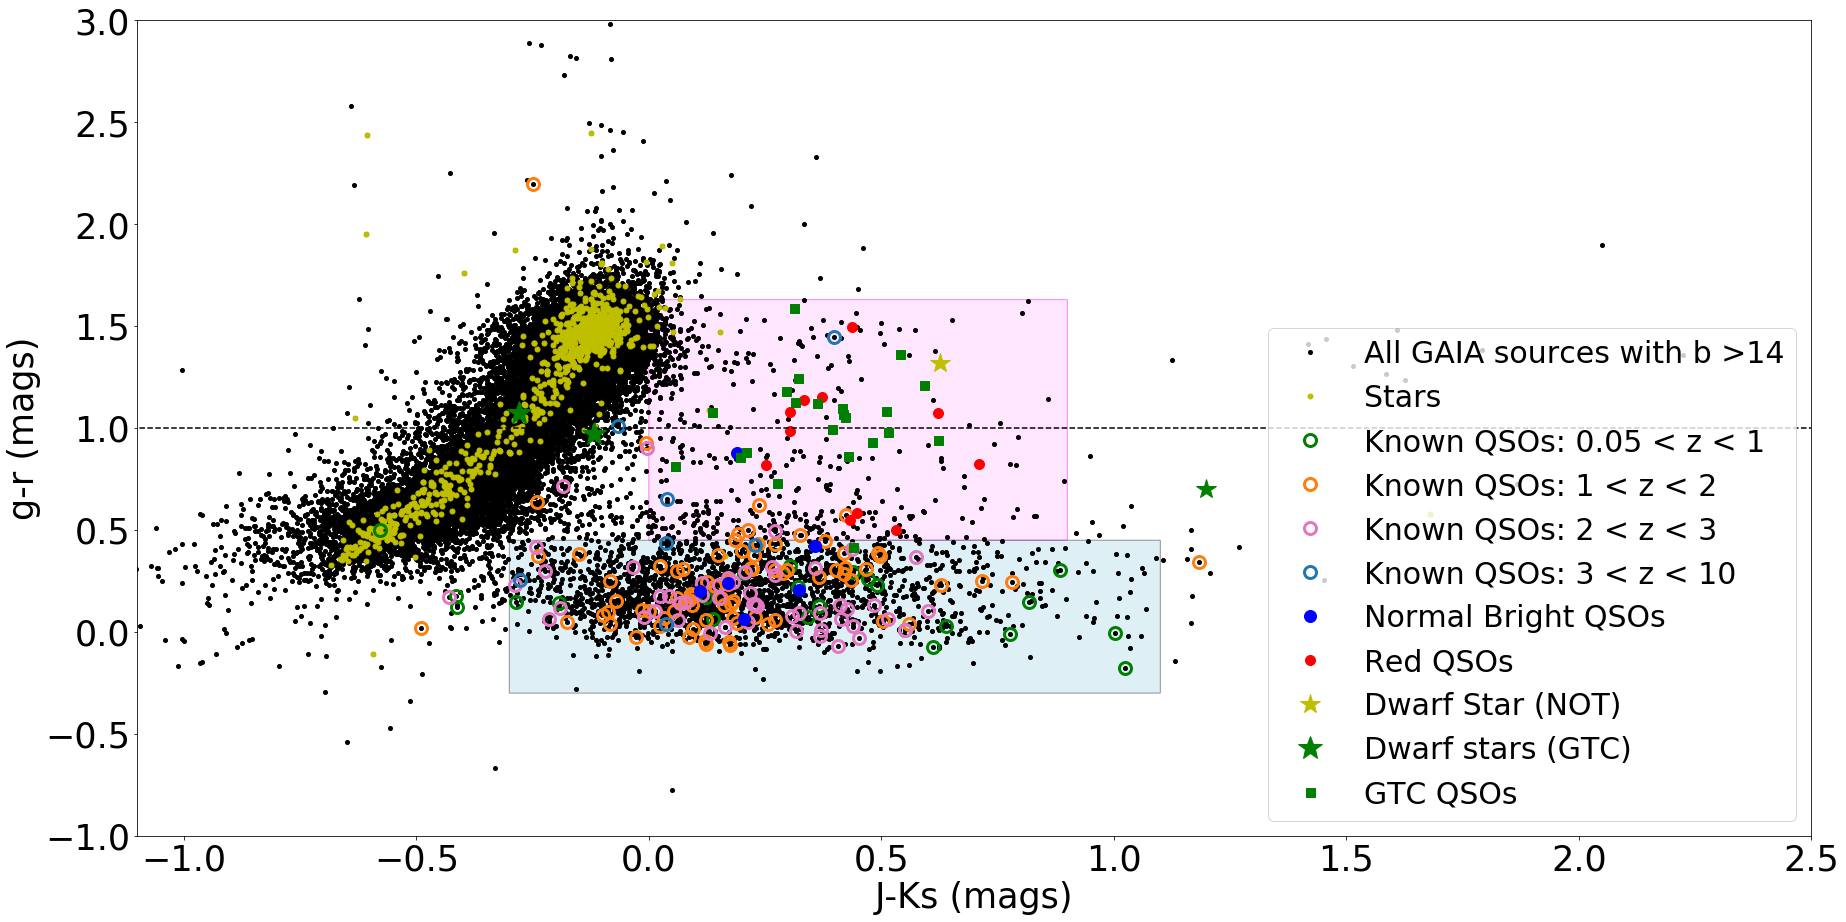

Number of all GAIA sources with r < 20 = 21813
Number of all GAIA sources with g >14 = 25804
Number of stars = 892
Number of known QSOs at 0.05<z<1 = 23
Number of known QSOs at 1<z<2 = 80
Number of known QSOs at 2<z<3 = 52
Number of known QSOs at 3<z<10 = 7


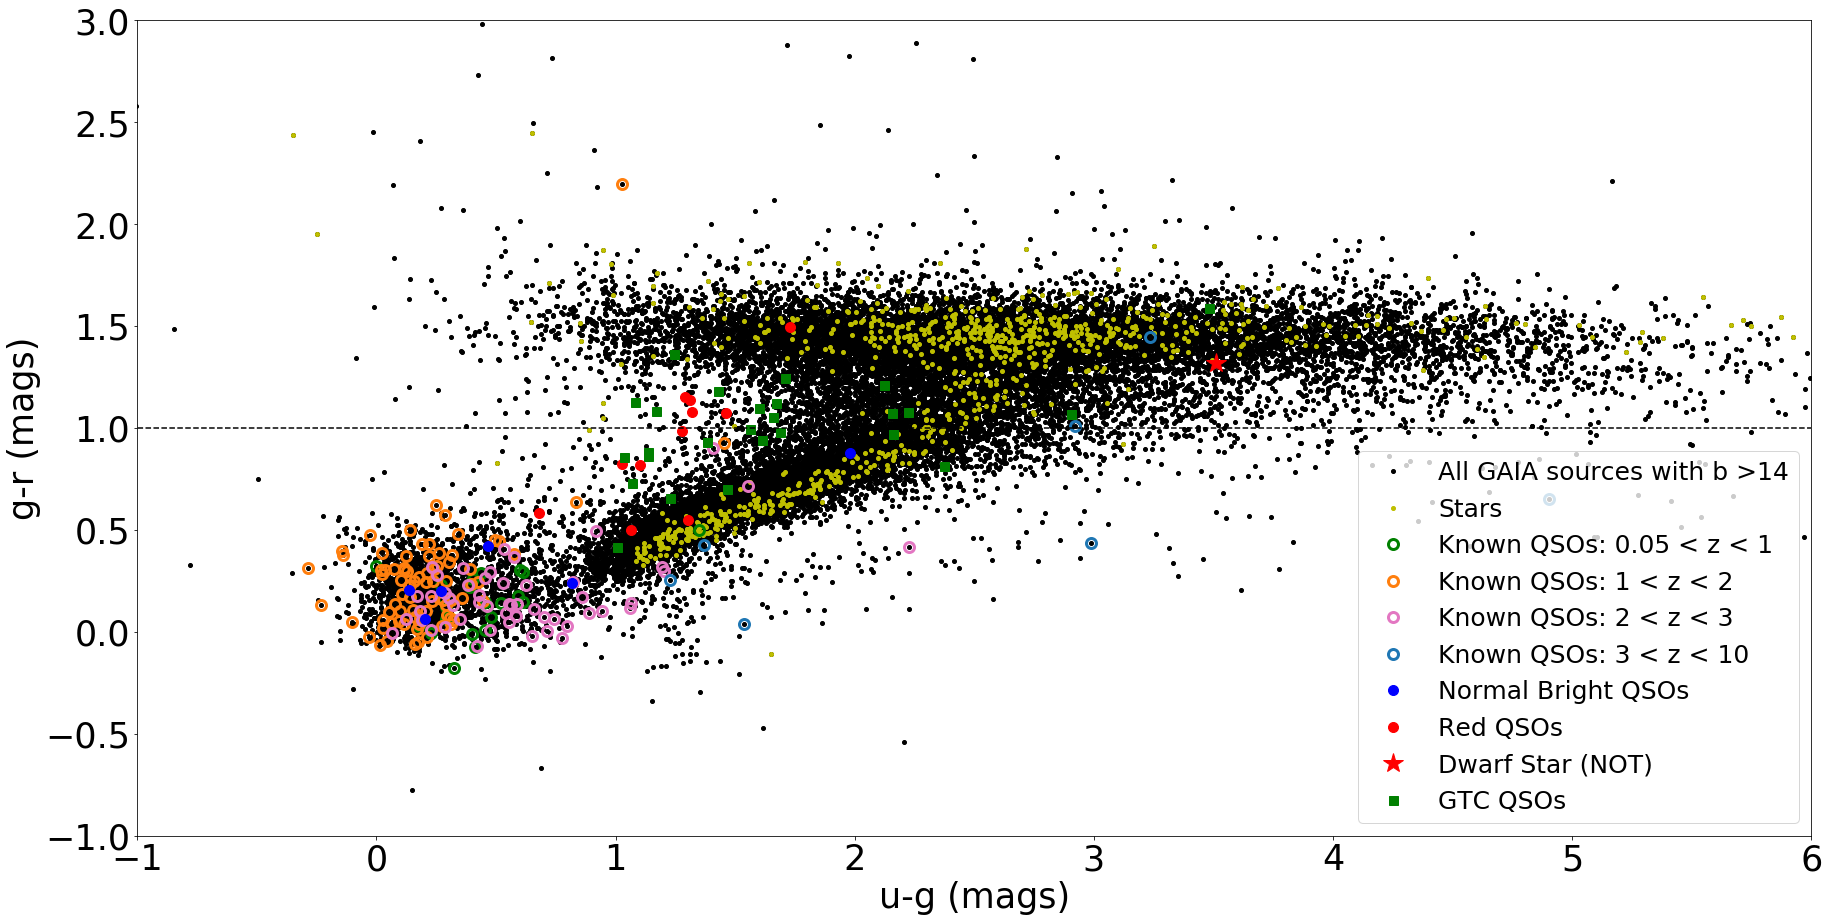

In [49]:
blim = 14.
rlim = 20. 
#------------------------------------------------- g-r vs J-Ks -----------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(30,15))
filt = np.nonzero((ggaia >= blim) & (rgaia < rlim) & (Jgaia <= 90.) & (Ks <= 90.))
filt1 = np.nonzero((pm/epm <= 3.) & (ggaia >= blim) & (Jgaia <= 90.) & (Ks <= 90.)) 
filt2 = np.nonzero((pm/epm < 3.) & (ggaia >= blim) & (plx/eplx >= 5.) & (Jgaia <= 90.) & (Ks <= 90.))
filt3= np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 0.05) & (specz <= 1.) & (Jgaia <= 90.) & (Ks <= 90.))
filt4= np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 1.) & (specz <= 2.) & (Jgaia <= 90.) & (Ks <= 90.))
filt5= np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 2.) & (specz <= 3.) & (Jgaia <= 90.) & (Ks <= 90.))
filt6= np.nonzero((specz != 0) & (ggaia >= blim) & (specz >= 3.) & (specz <= 10.) & (Jgaia <= 90.) & (Ks <= 90.))
filt7 = np.nonzero((pm/epm < 2) & (ggaia >= blim) & (plx/eplx <= 2.) & (Jgaia <=90) & (Ks <=90) & (specz >= 30) & (rgaia <= 19) 
                                 & (Jgaia-Ks >=0) & (ebv <= 0.1) & (W1-W2 >= 0.8))

#plt.plot(Jgaia[filt]-Ks[filt],ggaia[filt]-rgaia[filt],'mo', 
#         label='All GAIA sources with r <20', markersize=3)
plt.plot(Jgaia[filt1]-Ks[filt1],ggaia[filt1]-rgaia[filt1],'ko', 
         label='All GAIA sources with b >14', markersize=4)
plt.plot(Jgaia[filt2]-Ks[filt2],ggaia[filt2]-rgaia[filt2],'yo', 
         label='Stars', markersize=5)
plt.plot(Jgaia[filt3]-Ks[filt3],ggaia[filt3]-rgaia[filt3],'go', 
         label='Known QSOs: 0.05 < z < 1', markersize=12, mfc='none', markeredgewidth=3)
plt.plot(Jgaia[filt4]-Ks[filt4],ggaia[filt4]-rgaia[filt4],marker='o',color='tab:orange',
        label='Known QSOs: 1 < z < 2', markersize=12,linestyle="None", mfc='none', markeredgewidth=3)
plt.plot(Jgaia[filt5]-Ks[filt5],ggaia[filt5]-rgaia[filt5],marker='o',color='tab:pink', 
        label='Known QSOs: 2 < z < 3', markersize=12,linestyle="None", mfc='none', markeredgewidth=3)
plt.plot(Jgaia[filt6]-Ks[filt6],ggaia[filt6]-rgaia[filt6],marker='o',color='tab:blue', 
        label='Known QSOs: 3 < z < 10', markersize=12,linestyle="None", mfc='none', markeredgewidth=3)
#plt.plot(Jgaia[filt7]-Ks[filt7],ggaia[filt7]-rgaia[filt7],marker='o',color='tab:blue', 
 #       label='Normal Bright QSOs', markersize=8,linestyle="None")

plt.axis([-1.1,2.5,-1,3])

#The magnitudes
u = mags[:,0]
g = mags[:,1]
r = mags[:,2]
i = mags[:,3]
zs = mags[:,4] #zs in order to not confuse with the redshift
y = mags[:,5]
j = mags[:,6]
h = mags[:,7]
k = mags[:,8]

#Overplot the NOT targets:
Nspec=18
for s in range(Nspec):
    if s in range(Nspec-12):
        plt.plot(j[s]-k[s], g[s]-r[s],'bo', markersize=12, label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(j[s]-k[s],g[s]-r[s], '*y', markersize=20, label= 'Dwarf Star (NOT)')   #Plot the dwarf star
    #elif s==9:
    #    plt.plot(j[s]-k[s],g[s]-r[s],marker='o',color='#750000', linestyle="None", markersize=13) 
    #elif s==12:
    #    plt.plot(j[s]-k[s],g[s]-r[s] ,marker='o',color='#750000', linestyle="None", markersize=13) 
    #elif s==13:
    #    plt.plot(j[s]-k[s],g[s]-r[s] ,marker='o',color='#750000', linestyle="None", markersize=13)
    else:
        plt.plot(j[s]-k[s], g[s]-r[s],'ro', markersize=10, label= 'Red QSOs'if s == 7 else "")    #Red Quasars
ug=[-1.3,3.7]
gr=[1,1]  #g-r >= 1 cut 
plt.plot(ug,gr, '--k')  

#----------------------------------- Overplot the GTC targets ----------------------------------------------------------------
Ngtc=len(jgtc)

for n in range(Ngtc):
    #fl=np.nonzero((n == 9) & (n == 24))
    if n == 0:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='*', linestyle='None',color='green', markersize=25, label= 'Dwarf stars (GTC)')
    elif n == 4:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='*', linestyle='None',color='green', markersize=20)
    elif n == 6:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='*', linestyle='None',color='green', markersize=30)
    elif n == 15:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='*', linestyle='None',color='green', markersize=25)
    else:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker = 's',color='green', markersize=9,linestyle="None", label= 'GTC QSOs' if n == 7 else "")

# add a fancy box to include the red QSOs 
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
bb = mtransforms.Bbox([[0.9, 1.63], [0.0, 0.45]]) # Bbox object around which the fancy box will be drawn.
p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.0",  #determines what kind of fancy box will be drawn
                             fc=(1., .9, 1.),     #facecolor
                             ec=(1., 0.5, 1.))    #edgecolor

ax1 = fig.add_subplot(111)
bb1 = mtransforms.Bbox([[1.1, 0.45], [-0.3, -0.3]]) # Bbox object around which the fancy box will be drawn.
p1_fancy = FancyBboxPatch((bb1.xmin, bb1.ymin),
                             abs(bb1.width), abs(bb1.height),
                             boxstyle="round,pad=0.0",mutation_scale=2,  #determines what kind of fancy box will be drawn
                             fc='lightblue', alpha=0.4,   #facecolor
                             ec=(0, 0, 0))    #edgecolor
ax.add_patch(p_fancy)
ax1.add_patch(p1_fancy)
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.xlabel("J-Ks (mags)", fontsize = 35)
plt.ylabel("g-r (mags)", fontsize= 35)  
# Put a legend to the right of the current axis
#plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right', fontsize = 30)
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/grJK.pdf")
plt.show() 

print 'Number of all GAIA sources with r < 20 =', len(Jgaia[filt]-Ks[filt])
print 'Number of all GAIA sources with g >14 =', len(Jgaia[filt1]-Ks[filt1])
print 'Number of stars =', len(Jgaia[filt2]-Ks[filt2])
print 'Number of known QSOs at 0.05<z<1 =', len(Jgaia[filt3]-Ks[filt3])
print 'Number of known QSOs at 1<z<2 =', len(Jgaia[filt4]-Ks[filt4])
print 'Number of known QSOs at 2<z<3 =', len(Jgaia[filt5]-Ks[filt5])
print 'Number of known QSOs at 3<z<10 =', len(Jgaia[filt6]-Ks[filt6])


################################################## u-g vs g-r ###############################################################
#----------------------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(30,15))
plt.plot(ugaia[filt1]-ggaia[filt1],ggaia[filt1]-rgaia[filt1],'ko', 
         label='All GAIA sources with b >14', markersize=4)
plt.plot(ugaia[filt2]-ggaia[filt2],ggaia[filt2]-rgaia[filt2],'yo', 
         label='Stars', markersize=4)
plt.plot(ugaia[filt3]-ggaia[filt3],ggaia[filt3]-rgaia[filt3],'go', 
         label='Known QSOs: 0.05 < z < 1', markersize=10, mfc='none', markeredgewidth=3)
plt.plot(ugaia[filt4]-ggaia[filt4],ggaia[filt4]-rgaia[filt4],marker='o',color='tab:orange', 
        label='Known QSOs: 1 < z < 2', markersize=10,linestyle="None", mfc='none', markeredgewidth=3)
plt.plot(ugaia[filt5]-ggaia[filt5],ggaia[filt5]-rgaia[filt5],marker='o',color='tab:pink', 
        label='Known QSOs: 2 < z < 3', markersize=10,linestyle="None", mfc='none', markeredgewidth=3)
plt.plot(ugaia[filt6]-ggaia[filt6],ggaia[filt6]-rgaia[filt6],marker='o',color='tab:blue', 
        label='Known QSOs: 3 < z < 10', markersize=10,linestyle="None", mfc='none', markeredgewidth=3)
#Overplot the NOT targets:
Nspec=18
for s in range(Nspec):
    if s in range(Nspec-12):
        plt.plot(u[s]-g[s], g[s]-r[s],'bo',markersize=10, label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(u[s]-g[s],g[s]-r[s], '*r', markersize=20, label= 'Dwarf Star (NOT)')   #Plot the dwarf star
    #elif s == 6:
        #plt.plot(u[s]-g[s],g[s]-r[s], '*r', markersize=25) #red qsos at z > 2.2 
    #elif s == 9:
        #plt.plot(u[s]-g[s],g[s]-r[s], '*r', markersize=25)
    #elif s == 12:
        #plt.plot(u[s]-g[s],g[s]-r[s], '*r', markersize=25)
    #elif s == 13:
        #plt.plot(u[s]-g[s],g[s]-r[s], '*r', markersize=25)
    #elif s == 14:
        #plt.plot(u[s]-g[s],g[s]-r[s], '*r', markersize=25)
    else:
        plt.plot(u[s]-g[s], g[s]-r[s],'ro',markersize=10, label= 'Red QSOs'if s == 7 else "")    #Red Quasars
    
plt.plot(ugtc-ggtc, ggtc-rgtc,marker='s' , color='green', markersize=9, linestyle = 'None', label= 'GTC QSOs')


ug=[-1.3,6]
gr=[1,1]  #g-r >= 1 cut 
plt.plot(ug,gr, '--k')        
plt.xlabel("u-g (mags)", fontsize = 35)
plt.ylabel("g-r (mags)", fontsize = 35)  
# Put a legend to the right of the current axis
#plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right', fontsize = 25)

plt.axis([-1,6,-1,3])
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/ugr.pdf")
plt.show()


In [16]:
fl=np.nonzero((1.4<ugaia-ggaia) & (ugaia-ggaia<1.5) & (0.5<ggaia-rgaia) & (ggaia-rgaia<0.6) & (ggaia >= blim) & (plx/eplx >= 5.) & (Jgaia <= 90.) & (Ks <= 90.))
fl1=np.nonzero((1.4<ugaia-ggaia) & (ugaia-ggaia<1.5) & (1.4<ggaia-rgaia) & (ggaia-rgaia<1.5) & (ggaia >= blim) & (plx/eplx >= 5.) & (Jgaia <= 90.) & (Ks <= 90.))
fl2=np.nonzero((2.1<ugaia-ggaia) & (ugaia-ggaia<2.2) & (0.8<ggaia-rgaia) & (ggaia-rgaia<0.85) & (ggaia >= blim) & (plx/eplx >= 5.) & (Jgaia <= 90.) & (Ks <= 90.))
fl3=np.nonzero((2.1<ugaia-ggaia) & (ugaia-ggaia<2.2) & (1.4<ggaia-rgaia) & (ggaia-rgaia<1.5) & (ggaia >= blim) & (plx/eplx >= 5.) & (Jgaia <= 90.) & (Ks <= 90.))

print '1st locus:' ,ra[fl], dec[fl]
print '2nd locus:', ra[fl1], dec[fl1]
print '1st locus:', ra[fl2], dec[fl2]
print '2nd locus:', ra[fl3], dec[fl3]

1st locus: [-28.9208   -22.383708 -45.01714  -47.661696 -45.648803 -46.451878
  -6.750891 -33.709719  58.254073 -43.661787 -43.126057 -42.320251
 -36.496827   3.790755 -37.434535  29.563285  40.854936 -48.837069
  44.323128] [-0.947899 -0.82838   0.051843 -1.244965 -0.248412  0.552283  0.942129
 -0.385831 -1.124215 -0.609637  0.149388  0.925448 -1.241552 -1.128234
  1.023513  0.258613 -0.995934  0.389412  0.993443]
2nd locus: [-45.45277   33.170271] [ 0.553388 -0.483053]
1st locus: [-26.05008   48.005219 -33.647359 -41.115663] [-0.956275  1.182796 -0.32907   1.134207]
2nd locus: [-45.040493 -30.771978 -30.375967  -4.297005 -39.577227 -37.639936
 -35.944198  33.763962 -49.167738  35.134088] [-0.507007  1.026669  0.506467 -0.481752  1.253377 -0.543523  0.852789
 -0.115165  0.912079  1.066386]


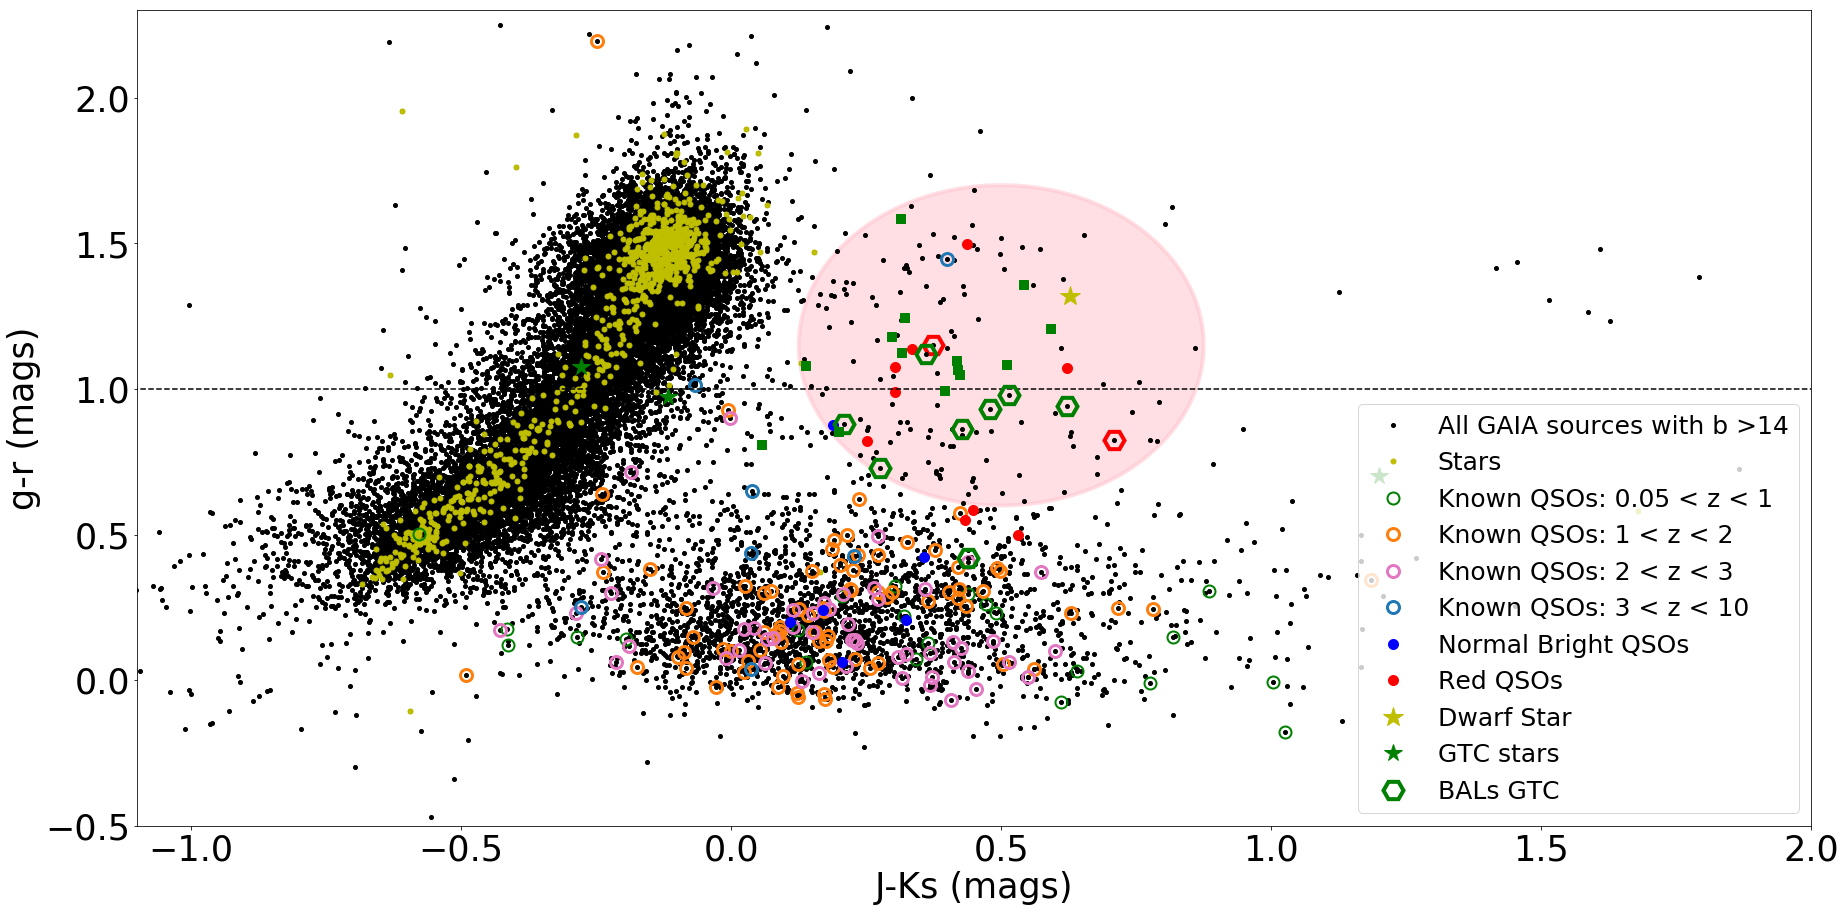

In [36]:
fig = plt.figure(figsize=(30,15))
plt.plot(Jgaia[filt1]-Ks[filt1],ggaia[filt1]-rgaia[filt1],'ko', 
         label='All GAIA sources with b >14', markersize=4)
plt.plot(Jgaia[filt2]-Ks[filt2],ggaia[filt2]-rgaia[filt2],'yo', 
         label='Stars', markersize=5)
plt.plot(Jgaia[filt3]-Ks[filt3],ggaia[filt3]-rgaia[filt3],'go', 
         label='Known QSOs: 0.05 < z < 1', markersize=12, mfc='none', markeredgewidth=2)
plt.plot(Jgaia[filt4]-Ks[filt4],ggaia[filt4]-rgaia[filt4],marker='o',color='tab:orange',
        label='Known QSOs: 1 < z < 2', markersize=12,linestyle="None", mfc='none', markeredgewidth=3)
plt.plot(Jgaia[filt5]-Ks[filt5],ggaia[filt5]-rgaia[filt5],marker='o',color='tab:pink', 
        label='Known QSOs: 2 < z < 3', markersize=12,linestyle="None", mfc='none', markeredgewidth=3)
plt.plot(Jgaia[filt6]-Ks[filt6],ggaia[filt6]-rgaia[filt6],marker='o',color='tab:blue', 
        label='Known QSOs: 3 < z < 10', markersize=12,linestyle="None", mfc='none', markeredgewidth=3)
#plt.plot(Jgaia[filt7]-Ks[filt7],ggaia[filt7]-rgaia[filt7],marker='o',color='tab:blue', 
 #       label='Normal Bright QSOs', markersize=8,linestyle="None")

plt.axis([-1.1,2.0,-0.5,2.3])

#The magnitudes
u = mags[:,0]
g = mags[:,1]
r = mags[:,2]
i = mags[:,3]
zs = mags[:,4] #zs in order to not confuse with the redshift
y = mags[:,5]
j = mags[:,6]
h = mags[:,7]
k = mags[:,8]

#Overplot the NOT targets:
Nspec=18
for s in range(Nspec):
    if s in range(Nspec-12):
        plt.plot(j[s]-k[s], g[s]-r[s],'bo', markersize=10, label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(j[s]-k[s],g[s]-r[s], '*y', markersize=20, label= 'Dwarf Star')   #Plot the dwarf star
    #elif s==9:
    #    plt.plot(j[s]-k[s],g[s]-r[s],marker='o',color='#750000', linestyle="None", markersize=13)  #high reddened 
    #elif s==12:
    #    plt.plot(j[s]-k[s],g[s]-r[s] ,marker='o',color='#750000', linestyle="None", markersize=13) 
    #elif s==13:
    #    plt.plot(j[s]-k[s],g[s]-r[s] ,marker='o',color='#750000', linestyle="None", markersize=13)
    elif s == 1:     # BAL
        plt.plot(j[s]-k[s],g[s]-r[s], marker = 'H', color = 'r',mfc='none', markersize=20, markeredgewidth=4, linestyle='None',label='BALs NOT')
    elif s == 6:     # BAL
        plt.plot(j[s]-k[s],g[s]-r[s], marker = 'H', color = 'r',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
    elif s == 13:     # BAL
        plt.plot(j[s]-k[s],g[s]-r[s], marker = 'H', color = 'r',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
    else:
        plt.plot(j[s]-k[s], g[s]-r[s],'ro', markersize=10, label= 'Red QSOs'if s == 7 else "")    #Red Quasars
ug=[-1.3,3.7]
gr=[1,1]  #g-r >= 1 cut 
plt.plot(ug,gr, '--k')  

#----------------------------------- Overplot the GTC targets ----------------------------------------------------------------
Ngtc=len(jgtc)
for n in range(Ngtc):
    #fl=np.nonzero((n == 9) & (n == 24))
    if n == 0:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='*', linestyle='None',color='green', markersize=18, label= 'GTC stars')
    elif n == 4:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='*', linestyle='None',color='green', markersize=18)
    elif n == 6:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='*', linestyle='None',color='green', markersize=18)
    elif n == 15:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='*', linestyle='None',color='green', markersize=18)
    elif n == 1:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None', label='BALs GTC')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    elif n == 2:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    elif n == 3:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    elif n == 7:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    elif n == 8:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    elif n == 13:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    elif n == 20:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    elif n == 21:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    elif n == 22:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='H',color='green',mfc='none', markersize=20, markeredgewidth=4, linestyle='None')
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker='o',color='black', markersize=3, markeredgewidth=2, linestyle='None')
    else:
        plt.plot(jgtc[n]-kgtc[n], ggtc[n]-rgtc[n],marker = 's',color='green', markersize=9,linestyle="None", label= 'GTC QSOs' if n == 7 else "")

# add a fancy box to include the red QSOs 
from matplotlib.patches import Ellipse

ax = fig.add_subplot(111)
circle1 =Ellipse((0.5, 1.15), 0.75, 1.1, alpha=0.5, lw=4,color='pink')
ax.add_artist(circle1)


plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.xlabel("J-Ks (mags)", fontsize = 35)
plt.ylabel("g-r (mags)", fontsize= 35)  
# Put a legend to the right of the current axis
#plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right', fontsize = 25)
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/grJKBAL.pdf")
plt.show() 

In [18]:
#print W1[ra>= 309]
#print W1[dec==0.533333333]

#ii = where(pm/epm LT 2 and g GE blim and plx/eplx LE 2 and J LE 90 and Ks LE 90 AND specz GE 30 and rold LE 19 and coldist lE 0.5 and J-Ks GE 0 and ebv LE 0.1 and W1-W2 GE 0.8)

In [19]:
from scipy.integrate import quad
def integrand(z, omm, oml):
    return 1./((1+z)*np.sqrt(omm*((1+z)**3)+oml))

H0=67.7*3.24*1e-21  #s^-1  
omm=0.31
oml=0.69
z=7.54
I = quad(integrand, z, np.inf, args=(omm,oml))
tu=(1./H0)*I[0]
print tu*(1.e-16/3.15)

def integrand(z,oml):
    return 1./((1+z)*np.sqrt(oml))

I1 = quad(integrand, 0, z, args=(oml))
tu=(1./H0)*I1[0]
print tu*(1.e-16/3.15)

6.93966527086
373.688839434


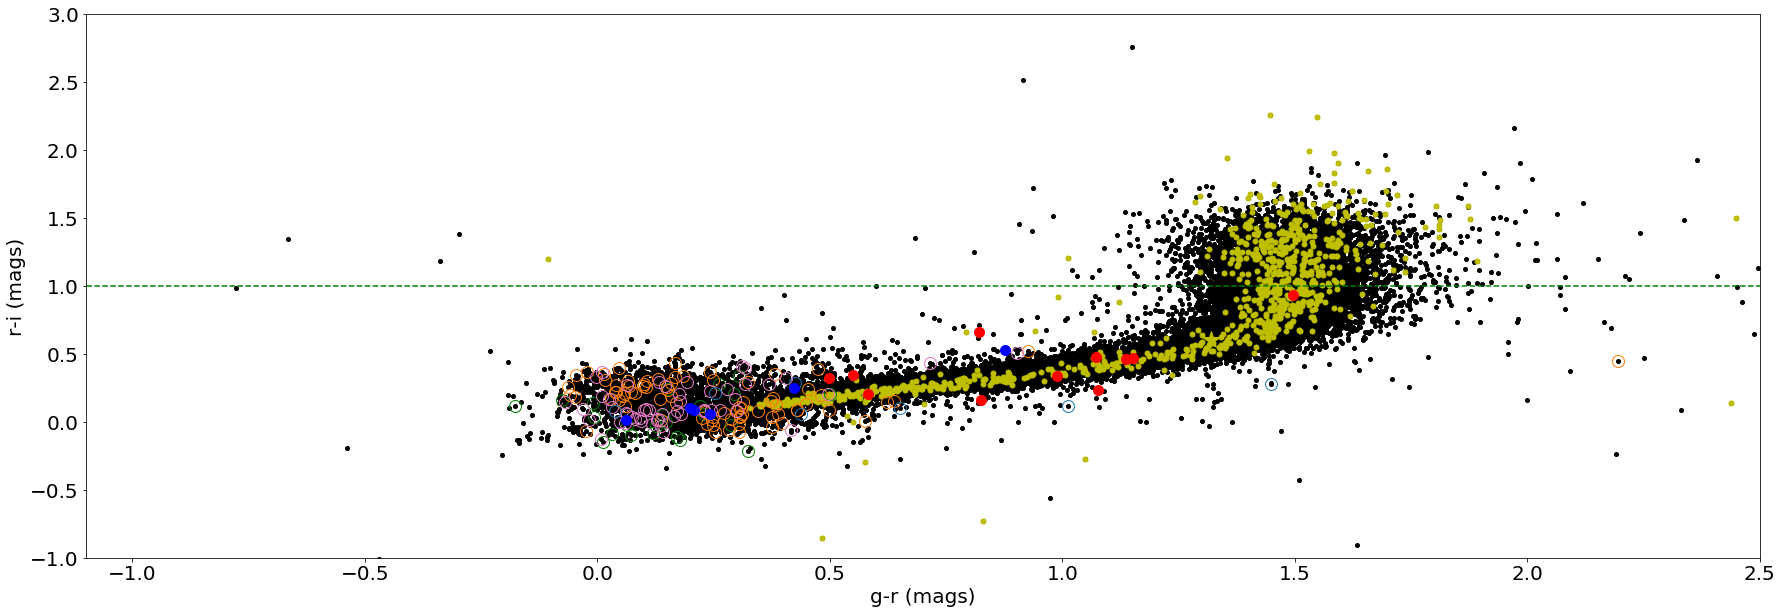

In [20]:
fig = plt.figure(figsize=(30,10))
plt.plot(ggaia[filt1]-rgaia[filt1],rgaia[filt1]-igaia[filt1],'ko', 
         label='All GAIA sources with b >14', markersize=4)
plt.plot(ggaia[filt2]-rgaia[filt2],rgaia[filt2]-igaia[filt2],'yo', 
         label='Stars', markersize=5)
plt.plot(ggaia[filt3]-rgaia[filt3],rgaia[filt3]-igaia[filt3],'go', 
         label='Known QSOs: 0.05 < z < 1', markersize=12, mfc='none')
plt.plot(ggaia[filt4]-rgaia[filt4],rgaia[filt4]-igaia[filt4],marker='o',color='tab:orange',
        label='Known QSOs: 1 < z < 2', markersize=12,linestyle="None", mfc='none')
plt.plot(ggaia[filt5]-rgaia[filt5],rgaia[filt5]-igaia[filt5],marker='o',color='tab:pink', 
        label='Known QSOs: 2 < z < 3', markersize=12,linestyle="None", mfc='none')
plt.plot(ggaia[filt6]-rgaia[filt6],rgaia[filt6]-igaia[filt6],marker='o',color='tab:blue', 
        label='Known QSOs: 3 < z < 10', markersize=12,linestyle="None", mfc='none')
#plt.plot(Jgaia[filt7]-Ks[filt7],ggaia[filt7]-rgaia[filt7],marker='o',color='tab:blue', 
 #       label='Normal Bright QSOs', markersize=8,linestyle="None")

plt.axis([-1.1,2.5,-1,3])

#The magnitudes
u = mags[:,0]
g = mags[:,1]
r = mags[:,2]
i = mags[:,3]
zs = mags[:,4] #zs in order to not confuse with the redshift
y = mags[:,5]
j = mags[:,6]
h = mags[:,7]
k = mags[:,8]

#Overplot the NOT targets:
Nspec=18
for s in range(Nspec):
    if s in range(Nspec-12):
        plt.plot(g[s]-r[s], r[s]-i[s],'bo', markersize=10, label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(g[s]-r[s],r[s]-i[s], '*y', markersize=18, label= 'Dwarf Star')   #Plot the dwarf star
    else:
        plt.plot(g[s]-r[s], r[s]-i[s],'ro', markersize=10, label= 'Red QSOs'if s == 7 else "")    #Red Quasars
ug=[-1.3,3.7]
gr=[1,1]  #g-r >= 1 cut 
plt.plot(ug,gr, '--g')  

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("g-r (mags)", fontsize = 20)
plt.ylabel("r-i (mags)", fontsize= 20)  
# Put a legend to the right of the current axis
#plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc='lower right', fontsize = 20)
plt.show() 


[1.122 1.099 0.609 1.268 1.558 1.141 0.858 1.184 1.326 0.928 1.432 1.361
 1.132 0.943 1.129 1.492 1.049 0.725]
23
20
80
79
52
44
7
2
SDSS Spectroscopically confirmed QSOs: 162
SDSS Spectroscopically confirmed QSOs at W1-W2>0.8: 145
89
number of NOT and GTC targets 45
all quasars 203
all sources at W1-W2 >0.8 = 187.0
completeness percent at W1-W2>0.8 = 90.6403940887
Number of qsos at W1-W2 <0.8 : 58.0
28.1553398058
Contamination by stars percent at W1-W2 >0.8: 1.60427807487


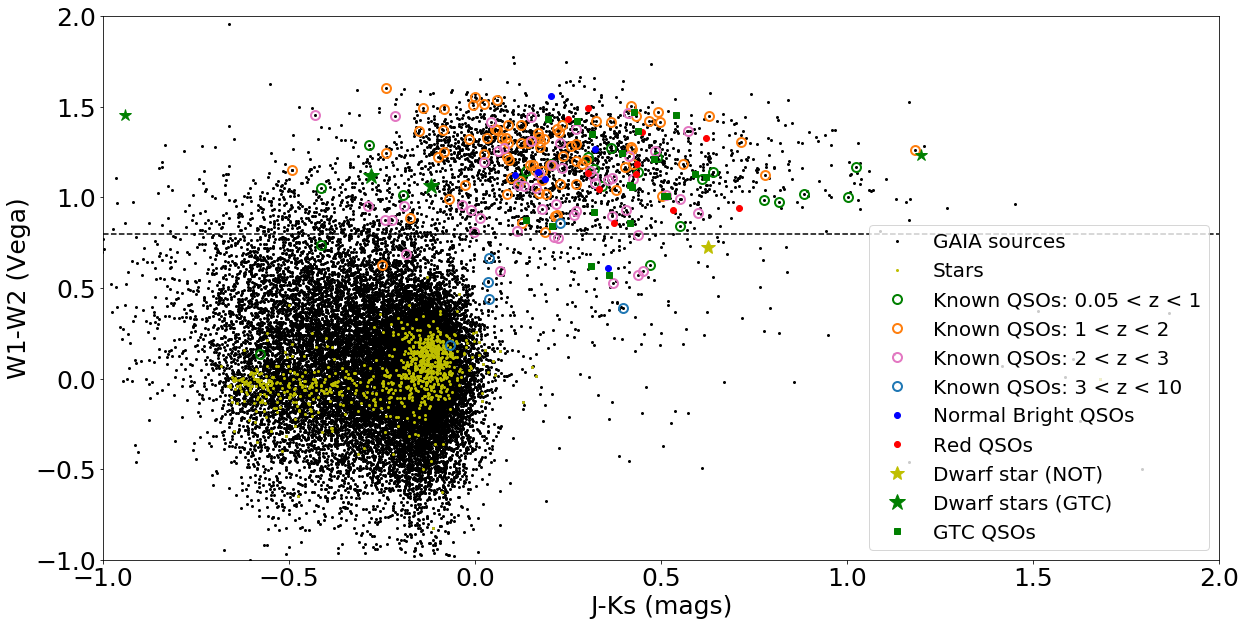

In [37]:
#wisegtc = np.loadtxt('/home/christina/Desktop/QSOs/GTC/GTC18B/GaiaObserved.dat',dtype=np.str)
#W1gtc = wisegtc[:,27] 
#W1gtc_err=wisegtc[:,28]
#W2gtc = wisegtc[:,29]
#W2gtc_err = wisegtc[:,30]
#W3gtc = wisegtc[:,31]
#W3gtc_err = wisegtc[:,32]
#W4gtc=wisegtc[:,33]
#W4gtc_err=wisegtc[:,34]

wisegtc = np.loadtxt('/home/christina/Desktop/QSOs/GTC/wisegtc.list')
W1gtc = wisegtc[:,0] 
W1gtc_err=wisegtc[:,1]
W2gtc = wisegtc[:,2]
W2gtc_err = wisegtc[:,3]
W3gtc = wisegtc[:,4]
W3gtc_err = wisegtc[:,5]
W4gtc=wisegtc[:,6]
W4gtc_err=wisegtc[:,7]
print w1-w2

#W1-W2,J-Ks plot
fl0=np.nonzero((W1-W2>0.8)&(specz != 0) & (ggaia >= blim) & (specz >= 0.05) & (specz <= 1.) & (Jgaia <= 90.) & (Ks <= 90.))
fl=np.nonzero((W1-W2>0.8)&(specz != 0) & (ggaia >= blim) & (specz >= 1.) & (specz <= 2.) & (Jgaia <= 90.) & (Ks <= 90.))
fl2=np.nonzero((W1-W2>0.8)&(specz != 0) & (ggaia >= blim) & (specz >= 2.) & (specz <= 3.) & (Jgaia <= 90.) & (Ks <= 90.))
fl3=np.nonzero((W1-W2>0.8)&(specz != 0) & (ggaia >= blim) & (specz >= 3.) & (specz <=10.) & (Jgaia <= 90.) & (Ks <= 90.))

print len((W1-W2)[filt3])
print len((W1-W2)[fl0])
print len((W1-W2)[filt4])
print len((W1-W2)[fl])
print len((W1-W2)[filt5])
print len((W1-W2)[fl2])
print len((W1-W2)[filt6])
print len((W1-W2)[fl3])
confqso=len((W1-W2)[filt3])+len((W1-W2)[filt4])+len((W1-W2)[filt5])+len((W1-W2)[filt6])
print 'SDSS Spectroscopically confirmed QSOs:', confqso
limqso=len((W1-W2)[fl0])+len((W1-W2)[fl])+len((W1-W2)[fl2])+len((W1-W2)[fl3])
print 'SDSS Spectroscopically confirmed QSOs at W1-W2>0.8:', limqso
print 145*100/162
print 'number of NOT and GTC targets', len(jgtc)+Nspec
print 'all quasars', confqso+(Nspec-1)+(len(jgtc)-3)
print 'all sources at W1-W2 >0.8 =', limqso+(Nspec+len(jgtc)-3.)
print 'completeness percent at W1-W2>0.8 =', (limqso+(Nspec+len(jgtc)-3.)-3)*100/(confqso+(Nspec-1)+(len(jgtc)-3))
belim =(confqso+len(jgtc)+Nspec-1)-(limqso+3.)    #spec conf qsos + GTC qsos + NOT (excluding the star) below the selection cut
print 'Number of qsos at W1-W2 <0.8 :',belim
print belim*100/(confqso+len(jgtc)+Nspec-1)
print 'Contamination by stars percent at W1-W2 >0.8:' ,3.*100/(limqso+(Nspec+len(jgtc)-3.))

#print len(W1[filt4]-W2[filt4])
fig = plt.figure(figsize=(20,10))
plt.plot(Jgaia[filt1]-Ks[filt1],W1[filt1]-W2[filt1], 'ko', markersize=2, label='GAIA sources')
plt.plot(Jgaia[filt2]-Ks[filt2],W1[filt2]-W2[filt2], 'yo', markersize=2, label='Stars')
plt.plot(Jgaia[filt3]-Ks[filt3],W1[filt3]-W2[filt3],'go', 
         label='Known QSOs: 0.05 < z < 1', markersize=9, markeredgewidth=2, mfc='none')
plt.plot(Jgaia[filt4]-Ks[filt4],W1[filt4]-W2[filt4],marker='o',color='tab:orange', 
        label='Known QSOs: 1 < z < 2', markersize=9,markeredgewidth=2,linestyle="None", mfc='none')
plt.plot(Jgaia[filt5]-Ks[filt5],W1[filt5]-W2[filt5],marker='o',color='tab:pink', 
        label='Known QSOs: 2 < z < 3', markersize=9,markeredgewidth=2,linestyle="None", mfc='none')
plt.plot(Jgaia[filt6]-Ks[filt6],W1[filt6]-W2[filt6],marker='o',color='tab:blue', 
        label='Known QSOs: 3 < z < 10', markersize=9,markeredgewidth=2,linestyle="None", mfc='none')
#plt.plot(Jgaia[filt7]-Ks[filt7],W1[filt7]-W2[filt7],marker='o',color='tab:purple', 
#        label='Normal Bright QSOs', markersize=8,linestyle="None")

#Overplot the NOT targets:
Nspec=18

for s in range(Nspec):
    if s in range(Nspec-12):
        plt.plot(j[s]-k[s], w1[s]-w2[s],'bo', label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(j[s]-k[s], w1[s]-w2[s], '*y', markersize=15, label= 'Dwarf star (NOT)')   #Plot the dwarf star
    else:
        plt.plot(j[s]-k[s], w1[s]-w2[s],'ro', label= 'Red QSOs'if s == 7 else "")    #Red Quasars
     
plt.xlabel("J-Ks (mags)", fontsize = 25)
plt.ylabel("W1-W2 (Vega)", fontsize = 25)  

#Overplot GTC targets 

for n in range(len(W1gtc)):
    if n == 0:
        plt.plot(jgtc[n]-kgtc[n], W1gtc[n]-W2gtc[n],marker='*', linestyle='None',color='green', markersize=17, label= 'Dwarf stars (GTC)')
    elif n == 4:
        plt.plot(jgtc[n]-kgtc[n], W1gtc[n]-W2gtc[n],marker='*', linestyle='None',color='green', markersize=13)
    elif n == 6:
        plt.plot(jgtc[n]-kgtc[n], W1gtc[n]-W2gtc[n],marker='*', linestyle='None',color='green', markersize=13)
    elif n == 15:
        plt.plot(jgtc[n]-kgtc[n], W1gtc[n]-W2gtc[n],marker='*', linestyle='None',color='green', markersize=17)
    else:
        plt.plot(jgtc[n]-kgtc[n], W1gtc[n]-W2gtc[n],marker = 's',color='green', markersize=6,linestyle="None", label= 'GTC QSOs' if n == 7 else "")

w1w2=[0.8,0.8]
jk=[-1,2]
plt.plot(jk,w1w2, '--k') 

# add a fancy box to include the red QSOs 
#ax = fig.add_subplot(111)
#bb = mtransforms.Bbox([[0.16, 0.65], [0.64, 1.48]]) # Bbox object around which the fancy box will be drawn.
#p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
 #                            abs(bb.width), abs(bb.height),
#                             boxstyle="round,pad=0.1",  #determines what kind of fancy box will be drawn
 #                            fc=(1., 1., 1.),     #facecolor
 #                            ec=(1., 0.5, 1.))    #edgecolor
#ax.add_patch(p_fancy)
plt.axis([-1,2,-1,2])
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Put a legend to the right of the current axis (outside of plot)
plt.legend(loc='lower right',fontsize=20)
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/w1w2JK.pdf")
#plt.grid()
plt.show()   

In [22]:
notdist=np.sqrt((g-r)**2+(j-k)**2)
print w1[notdist<2]
print w2[notdist<2]
print w1[notdist<2]-w2[notdist<2]
for n in range(18):
    if u[n]==22.259001:
        print w1[n]

[15.105 14.615 13.969 14.831 14.954 16.123 16.269 14.078 13.843 15.006
 14.552 14.704 16.143 15.644 15.494 15.432 15.336 16.94 ]
[13.983 13.516 13.36  13.563 13.396 14.982 15.411 12.894 12.517 14.078
 13.12  13.343 15.011 14.701 14.365 13.94  14.287 16.215]
[1.122 1.099 0.609 1.268 1.558 1.141 0.858 1.184 1.326 0.928 1.432 1.361
 1.132 0.943 1.129 1.492 1.049 0.725]
15.336


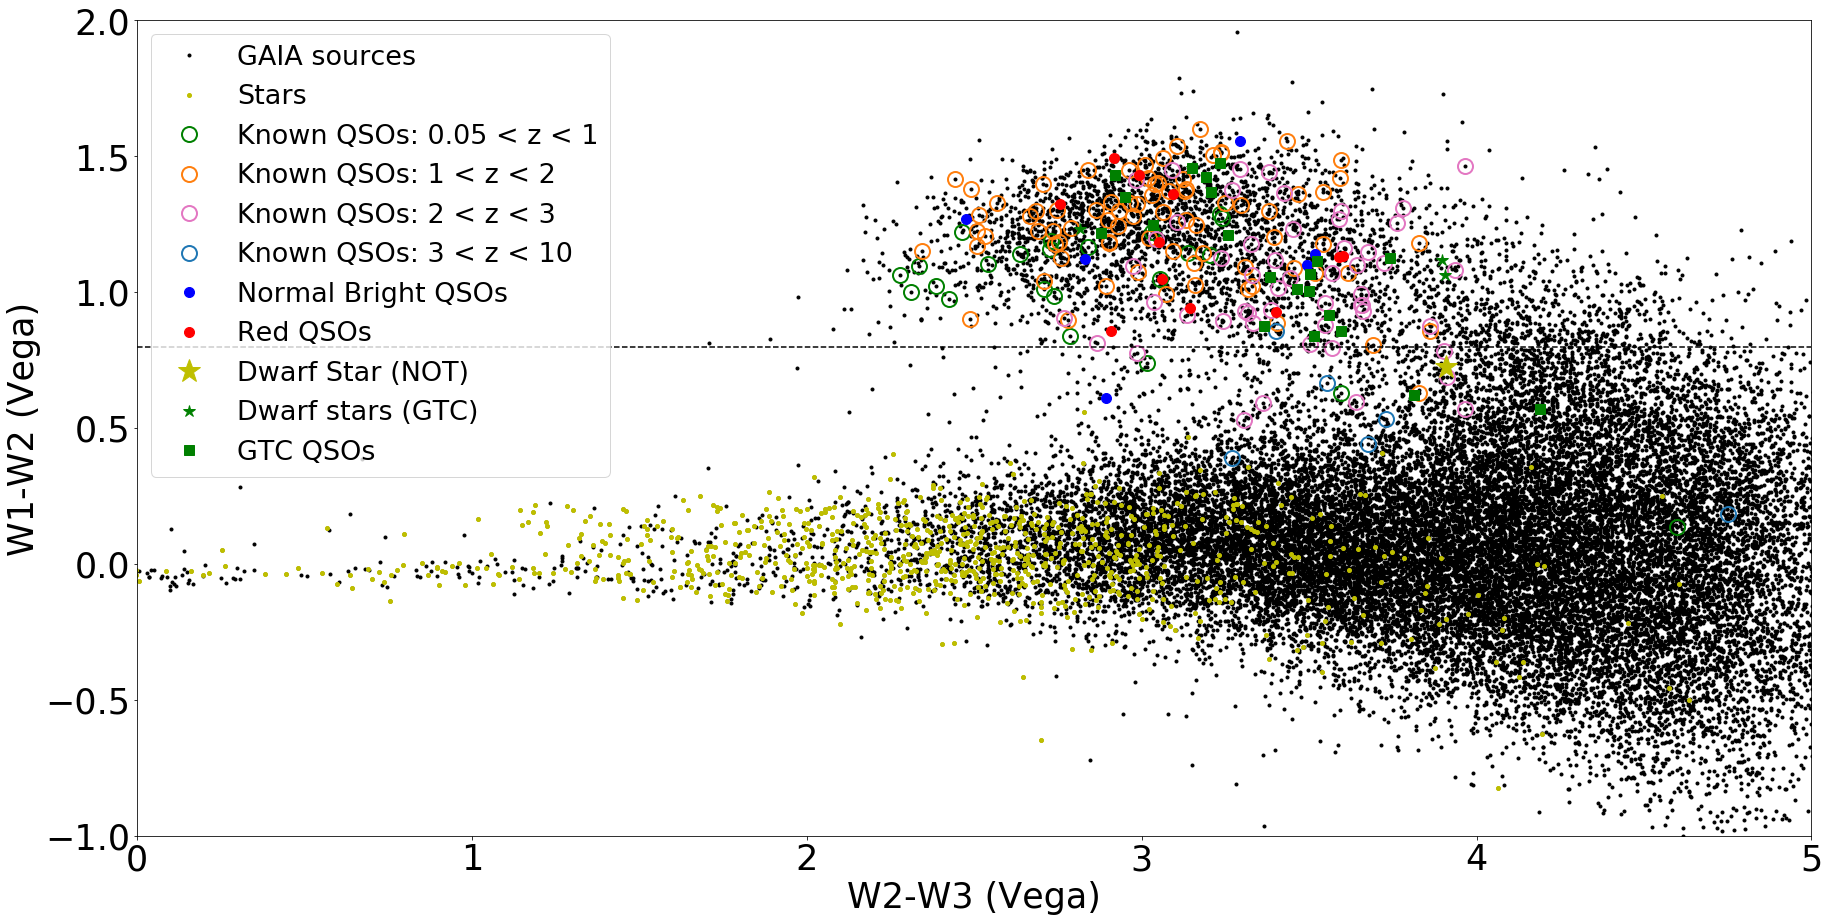

In [38]:
#-------------------------------------------------W1W2-W2W3-----------------------------------------------------------------------
fig = plt.figure(figsize=(30,15))
plt.plot(W2-W3,W1-W2,'ko', markersize=3, label='GAIA sources')
plt.plot(W2[filt2]-W3[filt2],W1[filt2]-W2[filt2], 'yo', markersize=4, label='Stars')
plt.plot(W2[filt3]-W3[filt3],W1[filt3]-W2[filt3],'go', 
         label='Known QSOs: 0.05 < z < 1', markersize=15, markeredgewidth=2, mfc='none')
plt.plot(W2[filt4]-W3[filt4],W1[filt4]-W2[filt4],marker='o',color='tab:orange', 
        label='Known QSOs: 1 < z < 2', markersize=15, markeredgewidth=2,linestyle="None", mfc='none')
plt.plot(W2[filt5]-W3[filt5],W1[filt5]-W2[filt5],marker='o',color='tab:pink', 
        label='Known QSOs: 2 < z < 3', markersize=15, markeredgewidth=2,linestyle="None", mfc='none')
plt.plot(W2[filt6]-W3[filt6],W1[filt6]-W2[filt6],marker='o',color='tab:blue', 
        label='Known QSOs: 3 < z < 10', markersize=15, markeredgewidth=2,linestyle="None", mfc='none')
w1w2=[0.8,0.8]   #W1-W2 > 0.8 cut 
w2w3=[0,6]
plt.plot(w2w3,w1w2, '--k') 

#Overplot the NOT targets:
Nspec=18
for s in range(Nspec):
    if s in range(Nspec-12):
        plt.plot(w2[s]-w3[s], w1[s]-w2[s],'bo',markersize=10, label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(w2[s]-w3[s], w1[s]-w2[s], '*y', markersize=24, label= 'Dwarf Star (NOT)')   #Plot the dwarf star
    else:
        plt.plot(w2[s]-w3[s], w1[s]-w2[s],'ro',markersize=10, label= 'Red QSOs'if s == 7 else "")    #Red Quasars
        
#Overplot GTC targets 

for n in range(len(W1gtc)):
    if n == 0:
        plt.plot(W2gtc[n]-W3gtc[n], W1gtc[n]-W2gtc[n],marker='*', linestyle='None',color='green', markersize=12, label= 'Dwarf stars (GTC)')
    elif n == 4:
        plt.plot(W2gtc[n]-W3gtc[n], W1gtc[n]-W2gtc[n],marker='*', linestyle='None',color='green', markersize=12)
    elif n == 6:
        plt.plot(W2gtc[n]-W3gtc[n], W1gtc[n]-W2gtc[n],marker='*', linestyle='None',color='green', markersize=12)
    elif n == 15:
        plt.plot(W2gtc[n]-W3gtc[n], W1gtc[n]-W2gtc[n],marker='*', linestyle='None',color='green', markersize=12)
    else:
        plt.plot(W2gtc[n]-W3gtc[n], W1gtc[n]-W2gtc[n],marker = 's',color='green', markersize=10,linestyle="None", label= 'GTC QSOs' if n == 7 else "")

plt.axis([0,5,-1,2])
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
plt.xlabel("W2-W3 (Vega)", fontsize = 35)
plt.ylabel("W1-W2 (Vega)", fontsize = 35)  
plt.legend(loc='upper left',fontsize=27)
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/w1w2w3w4.pdf")
plt.show()

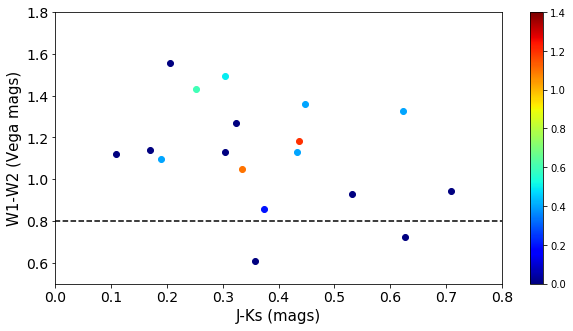

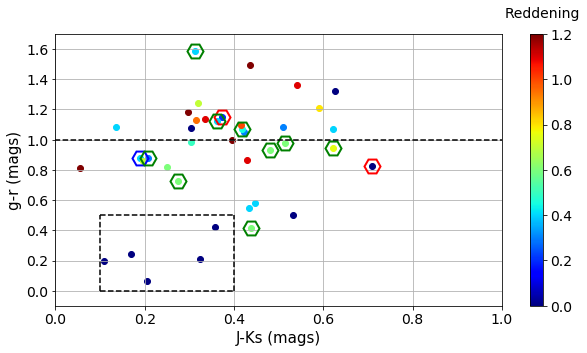

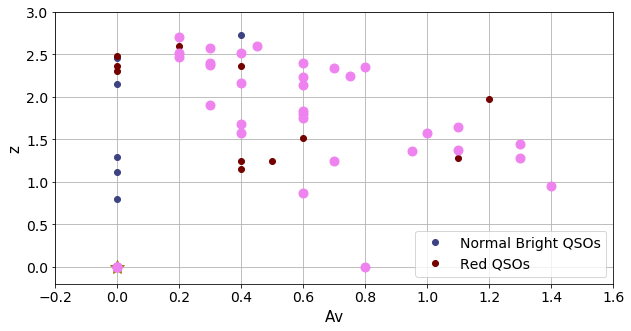

percent of BALS above g-r =1 : 33.3333333333


In [39]:
AB=zab[:,1]
ABgtc=gtcBzab[9:,1]
znot=zab[:,0]
zgt=gtcBzab[9:,0]

zall=np.concatenate((znot,zgt), axis=0)
red=np.concatenate((AB,ABgtc), axis=0)
jcon = np.concatenate((j,jgtc))
kcon=np.concatenate((k,kgtc))
gcon=np.concatenate((g,ggtc))
rcon=np.concatenate((r,rgtc))

####Plot with colormap and scattering points with colors depending on the reddening. ######
fig = plt.figure(figsize=(10,5))
Nspec=18
Ngtc=36
#cm = plt.cm.get_cmap('jet')
for s in range(Nspec):
    AB=zab[:,1]
    AB=AB[s] 
    plt.scatter(j[s]-k[s], w1[s]-w2[s], c=AB,vmin=0, vmax=1.4, cmap='jet')    #Red Quasars
plt.xlabel("J-Ks (mags)")
plt.ylabel("W1-W2 (Vega mags)")  
# Put a legend to the right of the current axis
#plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
w1w2=[0.8,0.8]   #W1-W2 > 0.8 cut 
w2w3=[-1,2]
plt.plot(w2w3,w1w2, '--k') 
plt.axis([0,0.8,0.5,1.8])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("J-Ks (mags)", fontsize = 15)
plt.ylabel("W1-W2 (Vega mags)", fontsize = 15)  
plt.colorbar()
plt.show()



#----------------------------------------- g-r vs J-K colourbar=reddening---------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))

#cm = plt.cm.get_cmap('jet')
for s in range(len(red)):
    AB=red[s]
    plt.scatter(jcon[s]-kcon[s], gcon[s]-rcon[s], c=AB,vmin=0, vmax=1.2, cmap='jet')    #Red Quasars
    i=18
    if s == 1:      #normal bright
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='blue',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs NOT')
    elif s == 6:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 1+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 2+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 3+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 7+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 8+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 18+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 19+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 20+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')

    #for n in range(len(red)-18):
 #   ABgtc=gtcBzab[:,1]
#    ABgtc=red[n]
#    print ABgtc
#    ABgtc=ABgtc[n] 
#    plt.plot(j[n]-k[n], g[n]-r[n],c=ABgtc) 
gr=[0.5,0.5] 
jk1=[0.1,0.4]
jk2=[0.4,0.4]
gr3=[0,0.5]
gr4=[0.0,0.5]
jk3=[0.1,0.1]
gr2=[0,0]
plt.plot(jk1,gr, '--k')
plt.plot(jk1,gr2, '--k')
plt.plot(jk2,gr3, '--k')
plt.plot(jk3,gr4, '--k')

ug=[-1,2]
gr=[1,1]  #g-r >= 1 cut 
plt.plot(ug,gr, '--k')  

plt.axis([0,1.0,-0.1,1.7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("J-Ks (mags)", fontsize = 15)
plt.ylabel("g-r (mags)", fontsize = 15)  
clb=plt.colorbar()
clb.ax.tick_params(labelsize=14)
clb.set_label('Reddening', labelpad=-30, fontsize=14, y=1.1, rotation=0)
plt.grid()
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/colbargrJKreddening.pdf")
plt.show()

fig = plt.figure(figsize=(10,5))
for s in range(Nspec):
    AB=zab[:,1]
    AB=AB[s] 
    z=zab[:,0]
    z=z[s]
    colour=['#FF5333']
    if s in range(Nspec-12):
        plt.plot(AB, z, marker='o',color='#3D4282', linestyle="None", label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(AB, z, marker='*',color='#A3781A', linestyle="None", markersize=15)   #Plot the dwarf star
    else:
        plt.plot(AB, z, marker='o',color='#750000', linestyle="None", label= 'Red QSOs'if s == 7 else "")    #Red Quasars
for n in range(Ngtc):
    ABgtc=gtcBzab[:,1]
    ABgtc=ABgtc[n] 
    zgtc=gtcBzab[:,0]
    zgtc=zgtc[n]
    colour=['violet']
    plt.plot(ABgtc, zgtc, marker='o',color='violet', linestyle="None", markersize=9, label= 'GTC' if s==7 else "")   #Plot the dwarf star
    #plt.plot(AB, z, 'bo')  
#jk=[-1.3,6]
#gr=[1,1]  #g-r >= 1 cut 
#plt.plot(jk,gr, '--g') 
plt.axis([-0.2,1.6,-0.2,3])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Av", fontsize = 15)
plt.ylabel("z", fontsize = 15)  
plt.legend(loc='lower right',fontsize=14)
plt.grid()
plt.show()

print 'percent of BALS above g-r =1 :', 4.*100/12.

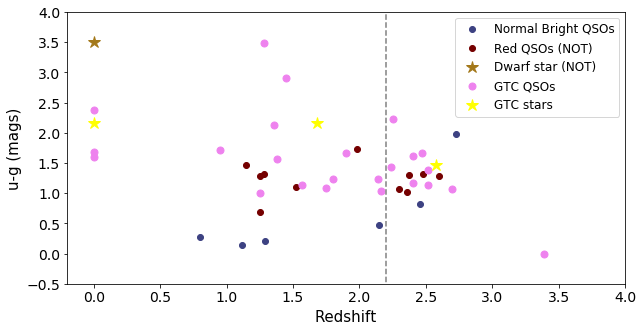

1


In [88]:
# Optical - redshift plot to show the z=2.2 limit above which SDSS fails to detect red QSOs.

fig = plt.figure(figsize=(10,5))
for s in range(Nspec):
    AB=zab[:,1]
    AB=AB[s] 
    z=zab[:,0]
    z=z[s]
    if s in range(Nspec-12):
        plt.plot(z, u[s]-g[s], marker='o',color='#3D4282', linestyle="None", label= 'Normal Bright QSOs' if s == 0 else "")     #Plot normal bright quasars 
    elif s == 17:
        plt.plot(z, u[s]-g[s], marker='*',color='#A3781A', linestyle="None", markersize=12, label='Dwarf star (NOT)')   #Plot the dwarf star
    else:
        plt.plot(z, u[s]-g[s], marker='o',color='#750000', linestyle="None", label= 'Red QSOs (NOT)'if s == 7 else "")    #Red Quasars
for n in range(Ngtc):
    ABgtc=gtcBzab[:,1]
    ABgtc=ABgtc[n] 
    zgtc=gtcBzab[:,0]
    zgtc=zgtc[n]
    if n==15:
        plt.plot(zgtc, ugtc[n]-ggtc[n], marker='*',color='yellow', linestyle="None", markersize=12, label= 'GTC stars')
    elif n==4:
        plt.plot(zgtc, ugtc[n]-ggtc[n], marker='*',color='yellow', linestyle="None", markersize=12)
    elif n==0:
        plt.plot(zgtc, ugtc[n]-ggtc[n], marker='*',color='yellow', linestyle="None", markersize=12)
    else:
        plt.plot(zgtc, ugtc[n]-ggtc[n], marker='o',color='violet', linestyle="None", markersize=7, label= 'GTC QSOs' if n==7 else "")
ug=([-1,4])
zz=([2.2,2.2])
plt.plot(zz,ug, color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Redshift", fontsize = 15)
plt.ylabel("u-g (mags)", fontsize = 15)
plt.axis([-0.2,4,-0.5,4])
plt.legend(loc='upper right', fontsize=12)
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/uvred.pdf")
plt.show()

g-r,J-K plot: IN this plot all the sources observed with the NOT and GTC are plotted colour coded depending on the reddening. The red hexagones are BALs in the NOT sample, the blue hexagone is the normal bright BAL, and the green are the BALs in the GTC sample. The dashed selection box shows the location of the normal bright QSOs, excluding the normal bright BAL that departs from this region (it is seen that all the normal bright within the selection box have zero reddening, while the BAL has Av=0.4 and so it appears redder in the g-r plane). 

In [25]:
print zall[red==0]

[0.8  2.15 1.12 1.29 2.46 2.3  2.48 2.36 0.   0.   0.   0.  ]


/home/christina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys


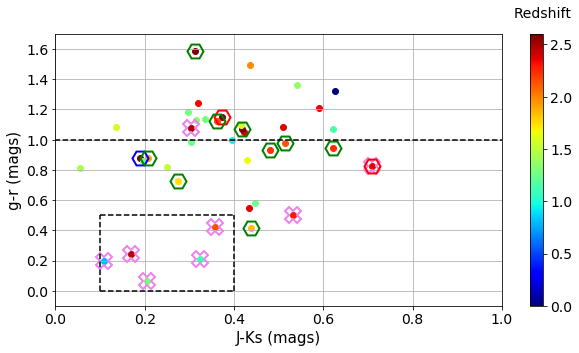

In [40]:
#--------------------- Plot with colormap and scattering points with colors depending on the redshift. -----------------------
fig = plt.figure(figsize=(10,5))

for s in range(len(zall)):
    zc=zall[s]
    plt.scatter(jcon[s]-kcon[s], gcon[s]-rcon[s], c=zc,vmin=0, vmax=2.6, cmap='jet')    #Red Quasars
    if zc[red[s]==0]:     #all with zero reddening 
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s], marker = 'X', color='violet', mfc='none', markersize=16, markeredgewidth=2,linestyle='none')
    i=18
    if s == 1: #normal bright BAL
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='blue',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs NOT')
    elif s == 6:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 13:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 1+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 2+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 3+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 7+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 8+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 18+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 19+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 20+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')

gr0=[0.5,0.5] 
jk1=[0.1,0.4]
jk2=[0.4,0.4]
gr3=[0,0.5]
gr4=[0.0,0.5]
jk3=[0.1,0.1]
gr2=[0,0]

ug=[-1,2]
gr=[1,1]  #g-r >= 1 cut 
plt.plot(ug,gr, '--k')  

plt.plot(jk1,gr0, '--k')
plt.plot(jk1,gr2, '--k')
plt.plot(jk2,gr3, '--k')
plt.plot(jk3,gr4, '--k')
plt.axis([0,1.0,-0.1,1.7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("J-Ks (mags)", fontsize = 15)
plt.ylabel("g-r (mags)", fontsize = 15)  
clb=plt.colorbar()
clb.ax.tick_params(labelsize=14)
clb.set_label('Redshift', labelpad=-30, fontsize=14, y=1.1, rotation=0)
plt.grid()
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/colbargrJKredshift.pdf")
plt.show()


This plot is colour coded depending on the redshift. The red hexagones show the red BALs at the NOT sample, the blue is the normal bright BAL and the green the BALs in the GTC sample. The purple crosses show all the sources with zero reddening and the selection box contains the normal bright QSOs, excluding the normal bright BAL.
It is also seen that all the red QSOs that have zero reddening are in a high redshift range (2.3-2.5). 

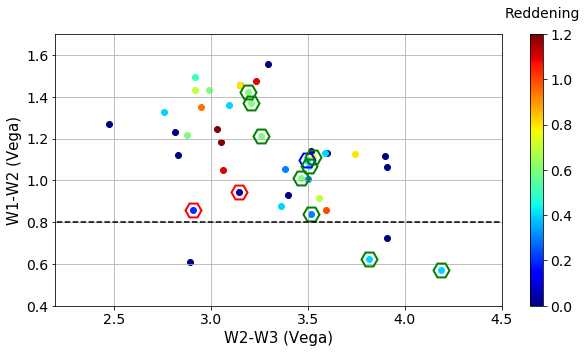

In [41]:
w1con=np.concatenate((w1,W1gtc))
w2con=np.concatenate((w2,W2gtc))
w3con=np.concatenate((w3,W3gtc))
w4con=np.concatenate((w4,W4gtc))
#----------------------------------------- g-r vs J-K colourbar=reddening---------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))

#cm = plt.cm.get_cmap('jet')
for s in range(len(red)):
    AB=red[s]
    plt.scatter(w2con[s]-w3con[s], w1con[s]-w2con[s], c=AB,vmin=0, vmax=1.2, cmap='jet')    #Red Quasars
    i=18
    if s == 1:      #normal bright
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='blue',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs NOT')
    elif s == 6:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 1+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 2+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 3+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 7+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 8+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 18+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 19+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 20+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')

    #for n in range(len(red)-18):
 #   ABgtc=gtcBzab[:,1]
#    ABgtc=red[n]
#    print ABgtc
#    ABgtc=ABgtc[n] 
#    plt.plot(j[n]-k[n], g[n]-r[n],c=ABgtc) 
w1w2=[0.8,0.8]
jk=[2,5]
plt.plot(jk,w1w2, '--k')

plt.axis([2.2,4.5,0.4,1.7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("W2-W3 (Vega)", fontsize = 15)
plt.ylabel("W1-W2 (Vega)", fontsize = 15)  
clb=plt.colorbar()
clb.ax.tick_params(labelsize=14)
clb.set_label('Reddening', labelpad=-30, fontsize=14, y=1.1, rotation=0)
plt.grid()
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/colbarw123reddening.pdf")
plt.show()

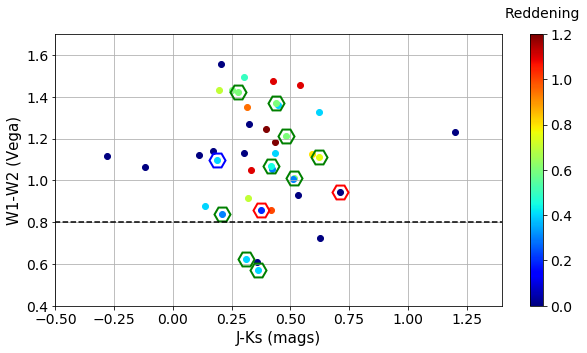

In [42]:
#----------------------------------------- g-r vs J-K colourbar=reddening---------------------------------------------------------------------------
fig = plt.figure(figsize=(10,5))

#cm = plt.cm.get_cmap('jet')
for s in range(len(red)):
    AB=red[s]
    plt.scatter(jcon[s]-kcon[s], w1con[s]-w2con[s], c=AB,vmin=0, vmax=1.2, cmap='jet')    #Red Quasars
    i=18
    if s == 1:      #normal bright
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='blue',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs NOT')
    elif s == 6:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 1+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 2+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 3+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 7+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 8+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 18+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 19+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 20+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')

w1w2=[0.8,0.8]
jk=[-0.8,2]
plt.plot(jk,w1w2, '--k')

plt.axis([-0.5,1.4,0.4,1.7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("J-Ks (mags)", fontsize = 15)
plt.ylabel("W1-W2 (Vega)", fontsize = 15)  
clb=plt.colorbar()
clb.ax.tick_params(labelsize=14)
clb.set_label('Reddening', labelpad=-30, fontsize=14, y=1.1, rotation=0)
plt.grid()
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/colbarw12JKreddening.pdf")
plt.show()

/home/christina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys


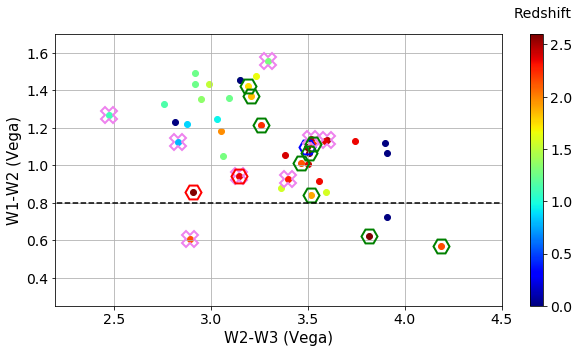

BALs at W1-W2 > 0.8: 83.3333333333


In [43]:
#--------------------- Plot with colormap and scattering points with colors depending on the redshift. -----------------------
fig = plt.figure(figsize=(10,5))

for s in range(len(zall)):
    zc=zall[s]
    plt.scatter(w2con[s]-w3con[s], w1con[s]-w2con[s], c=zc,vmin=0, vmax=2.6, cmap='jet')    #Red Quasars
    if zc[red[s]==0]:     #all with zero reddening 
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s], marker = 'X', color='violet', mfc='none', markersize=16, markeredgewidth=2,linestyle='none')
    i=18
    if s == 1: #normal bright BAL
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='blue',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs NOT')
    elif s == 6:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 13:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 1+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 2+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 3+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 7+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 8+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 18+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 19+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 20+i:
        plt.plot(w2con[s]-w3con[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')

ug=[2,4.6]
gr=[0.8,0.8]  #g-r >= 1 cut 
plt.plot(ug,gr, '--k')  

plt.axis([2.2,4.5,0.25,1.7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("W2-W3 (Vega)", fontsize = 15)
plt.ylabel("W1-W2 (Vega)", fontsize = 15)  
clb=plt.colorbar()
clb.ax.tick_params(labelsize=14)
clb.set_label('Redshift', labelpad=-30, fontsize=14, y=1.1, rotation=0)
plt.grid()
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/colbarw123redshift.pdf")
plt.show()

print 'BALs at W1-W2 > 0.8:', 10.*100/12.

/home/christina/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys


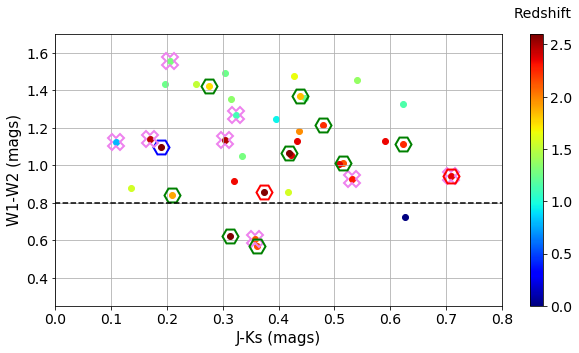

In [44]:
#--------------------- Plot with colormap and scattering points with colors depending on the redshift. -----------------------
fig = plt.figure(figsize=(10,5))

for s in range(len(zall)):
    zc=zall[s]
    plt.scatter(jcon[s]-kcon[s], w1con[s]-w2con[s], c=zc,vmin=0, vmax=2.6, cmap='jet')    #Red Quasars
    if zc[red[s]==0]:     #all with zero reddening 
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s], marker = 'X', color='violet', mfc='none', markersize=16, markeredgewidth=2,linestyle='none')
    i=18
    if s == 1: #normal bright BAL
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='blue',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs NOT')
    elif s == 6:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 13:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 1+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 2+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 3+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 7+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 8+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 13+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 18+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 19+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 20+i:
        plt.plot(jcon[s]-kcon[s], w1con[s]-w2con[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')

gr0=[0.5,0.5] 
jk1=[0.1,0.4]
jk2=[0.4,0.4]
gr3=[0,0.5]
gr4=[0.0,0.5]
jk3=[0.1,0.1]
gr2=[0,0]

ug=[-1,2]
gr=[0.8,0.8]  #g-r >= 1 cut 
plt.plot(ug,gr, '--k')  

plt.axis([0,0.8,0.25,1.7])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("J-Ks (mags)", fontsize = 15)
plt.ylabel("W1-W2 (mags)", fontsize = 15)  
clb=plt.colorbar()
clb.ax.tick_params(labelsize=14)
clb.set_label('Redshift', labelpad=-30, fontsize=14, y=1.1, rotation=0)
plt.grid()
plt.savefig("/home/christina/Desktop/QSOs/Figures/Colour_diagrams/colbarw12JKredshift.pdf")
plt.show()

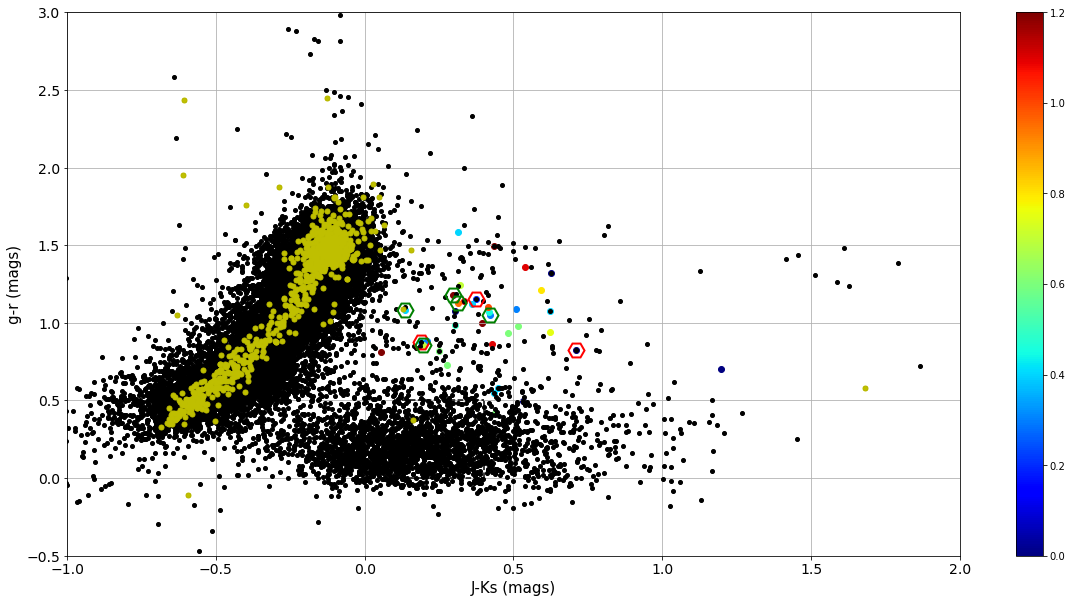

In [31]:
fig = plt.figure(figsize=(20,10))

plt.plot(Jgaia[filt1]-Ks[filt1],ggaia[filt1]-rgaia[filt1],'ko', 
         label='All GAIA sources with b >14', markersize=4)
plt.plot(Jgaia[filt2]-Ks[filt2],ggaia[filt2]-rgaia[filt2],'yo', 
         label='Stars', markersize=5)

for s in range(len(red)):
    AB=red[s]
    plt.scatter(jcon[s]-kcon[s], gcon[s]-rcon[s], c=AB,vmin=0, vmax=1.2, cmap='jet')    #Red Quasars
    i=18
    if s == 1:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs NOT')
    elif s == 6:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 13:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='red',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 10+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None', label='BALs GTC')
    elif s == 11+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 12+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 16+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 17+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 22+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 27+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 28+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')
    elif s == 29+i:
        plt.plot(jcon[s]-kcon[s], gcon[s]-rcon[s],marker='H',color='green',mfc='none', markersize=16, markeredgewidth=2, linestyle='None')

gr=[0.5,0.5] 
jk1=[0.1,0.4]
jk2=[0.4,0.4]
gr3=[0,0.5]
gr4=[0.0,0.5]
jk3=[0.1,0.1]
gr2=[0,0]
plt.plot(jk1,gr, '--k')
plt.plot(jk1,gr2, '--k')
plt.plot(jk2,gr3, '--k')
plt.plot(jk3,gr4, '--k')
plt.axis([-1,2.0,-0.5,3])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("J-Ks (mags)", fontsize = 15)
plt.ylabel("g-r (mags)", fontsize = 15)  
plt.colorbar()
plt.grid()
plt.show()

In [29]:
#Foreground Dust
### Central wavelengths for broad band filters (Aangstrom)
lambdau=3540.
lambdag=4750.
lambdar=6220.
lambdai=7630.
lambdaz=9050.
lambday=10310.
lambdaj=12480.
lambdah=16310.
lambdak=22010.

#Build an array with the wavelengths
wavar=np.array([lambdau, lambdag, lambdar, lambdai, lambdaz, lambday, lambdaj,lambdah, lambdak])  

e=open("/home/christina/Desktop/QSOs/dustcor.list", "w")    #open file to write 
#Nspec=18
for s in range(len(rgaia)):
    #Convert mags to flux for each filter:
    fluxu = 10.**(0.4*(-48.60-ugaia[s]))*3.e18/lambdau**2 
    fluxg = 10.**(0.4*(-48.60-ggaia[s]))*3.e18/lambdag**2
    fluxr = 10.**(0.4*(-48.60-rgaia[s]))*3.e18/lambdar**2
    fluxi = 10.**(0.4*(-48.60-igaia[s]))*3.e18/lambdai**2
    fluxz = 10.**(0.4*(-48.60-zgaia[s]))*3.e18/lambdaz**2
    fluxy = 10.**(0.4*(-48.60-Ygaia[s]))*3.e18/lambday**2
    fluxj = 10.**(0.4*(-48.60-Jgaia[s]))*3.e18/lambdaj**2
    fluxh = 10.**(0.4*(-48.60-Hgaia[s]))*3.e18/lambdah**2
    fluxk = 10.**(0.4*(-48.60-Ks[s]))*3.e18/lambdak**2
    #convert to array
    fluxar=np.array([fluxu, fluxg, fluxr, fluxi, fluxz, fluxy, fluxj,fluxh, fluxk])  
    
    ur = ugaia*0.
    gr = ugaia*0.
    rr = ugaia*0.
    ir = ugaia*0.
    zr = ugaia*0.
    yr = ugaia*0.
    jr = ugaia*0.
    hr = ugaia*0.
    ksr = ugaia*0.
    
    #Correct for galactic extinction
    if ugaia[s] <= 30:
        funred = pyasl.unred(wavar, fluxar, ebv[s])     #dust correction
        ur = -48.60-2.5*np.log10([funred*lambdau**2./3e18])  
        ur=ur[0]
    elif ugaia[s] >= 30:
        ur = ugaia
    if ggaia[s] <= 30:
        gr = -48.60-2.5*np.log10([funred*lambdag**2./3e18])
        gr = gr[0]
    elif ggaia[s] >= 30:
        gr = ggaia
    if rgaia[s] <= 30:
        rr = -48.60-2.5*np.log10([funred*lambdar**2./3e18])
        rr = rr[0]
    elif rgaia[s] >= 30:
        rr = rgaia
    if igaia[s] <= 30:
        ir = -48.60-2.5*np.log10([funred*lambdai**2./3e18])
        ir = ir[0]
    elif igaia[s] >= 30:
        ir = igaia
    if zgaia[s] <= 30:
        zr = -48.60-2.5*np.log10([funred*lambdaz**2./3e18])
        zr = zr[0]
    elif zgaia[s] >= 30:
        zr = zgaia
    if Ygaia[s] <= 30:
        yr = -48.60-2.5*np.log10([funred*lambday**2./3e18])
        yr = yr[0]
    elif Ygaia[s] >= 30:
        yr = Ygaia
    if Jgaia[s] <= 30:
        jr = -48.60-2.5*np.log10([funred*lambdaj**2./3e18])
        jr = jr[0]
    elif Jgaia[s] >= 30:
        jr = Jgaia
    if Hgaia[s] <= 30:
        hr = -48.60-2.5*np.log10([funred*lambdah**2./3e18])
        hr = hr[0]
        #print hr
    elif Hgaia[s] >= 30:
        hr = Hgaia
        #print hr 
    if Ks[s] <= 30:
        ksr = -48.60-2.5*np.log10([funred*lambdak**2./3e18])
        ksr = ksr[0]
        #print ksr
    else:
        ksr = Ks
    #elif Ks[s] >= 30:
    #    ksr = Ks
     #   print len(ksr[Ks >=30]) 
   # ar=np.array([ur[0],gr[0],rr[0],ir[0],zr[0],yr[0],jr[0],hr[0],ksr[0]])    
   # print ar
    #a=(''.join(str(ar)))
    #print a
   # e.write("%s\n" % a)
    #e.write(gr)
    #print gr
    #print rr 
    #print ir 
    #print ksr
    #gr=gr[0]
    #rr=rr[0]
    #jr=Jr[0]
    #ksr=ksr[0]
e.close()   
    